# Hospital Readmission Prediction using Machine Learning
**Author**: Shruthin Reddy  
**Dataset**: UCI Diabetic Hospital Dataset  
**Goal**: Predict 30-day readmissions and improve patient outcomes  


In [1]:
import numpy as np 
import pandas as pd 

## **Data Loading** 

In [2]:
data_1=pd.read_csv("diabetic_data.csv")
data_1_map=pd.read_csv("IDS_mapping.csv")
data_1.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO



Intially loaded two datasets:
- `diabetic_data.csv`: Contains patient admission details, lab tests, medication usage, and readmission status.
- `IDS_mapping.csv`: Mapping file for interpreting code-based features such as diagnosis codes and medication categories.


In [3]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
data_1.isna().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

**Data Structure Analysis**

After examining the DataFrame information:

**Key Observations**:
- **Dataset Size**: 101,766 entries with 50 columns
- **Data Types**: 13 integer columns and 37 object columns
- **Missing Values**:
  - `max_glu_serum`: Only 5,346 non-null values (5.3%)
  - `A1Cresult`: Only 17,018 non-null values (16.7%)
  - Other columns appear complete but may contain placeholder values


## **Data Cleaning** 

In [5]:
data_1.drop(['encounter_id','patient_nbr'], axis=1, inplace=True)


Dropped `encounter_id` and `patient_nbr` since they are unique identifiers and do not contribute to the prediction of readmission.


In [6]:
data_1[['race','payer_code','medical_specialty','diag_1','diag_2','diag_3']]

,race,payer_code,medical_specialty,diag_1,diag_2,diag_3
0,Caucasian,?,Pediatrics-Endocrinology,250.83,?,?
1,Caucasian,?,?,276,250.01,255
2,AfricanAmerican,?,?,648,250,V27
3,Caucasian,?,?,8,250.43,403
4,Caucasian,?,?,197,157,250
...,...,...,...,...,...,...
101761,AfricanAmerican,MC,?,250.13,291,458
101762,AfricanAmerican,MC,?,560,276,787
101763,Caucasian,MC,?,38,590,296
101764,Caucasian,MC,Surgery-General,996,285,998



In this dataset, missing values are represented by the string `"?"`.




In [7]:

value_to_find = "?"

for column in data_1.columns:
    if data_1[column].isin([value_to_find]).any():
        count = data_1[column].isin([value_to_find]).sum()
        print(f"Column '{column}' contains '{value_to_find}' ({count} occurrences)")

Column 'race' contains '?' (2273 occurrences)
Column 'weight' contains '?' (98569 occurrences)
Column 'payer_code' contains '?' (40256 occurrences)
Column 'medical_specialty' contains '?' (49949 occurrences)
Column 'diag_1' contains '?' (21 occurrences)
Column 'diag_2' contains '?' (358 occurrences)
Column 'diag_3' contains '?' (1423 occurrences)


In [8]:
data_1.replace("?",np.nan,inplace=True)
data_1.isna().sum()

race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [10]:
data_1[['A1Cresult','max_glu_serum']]

,A1Cresult,max_glu_serum
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
101761,>8,NaN
101762,NaN,NaN
101763,NaN,NaN
101764,NaN,NaN


In [11]:

data_1.replace(np.nan,"none",inplace=True)
data_1[['A1Cresult','max_glu_serum']]

,A1Cresult,max_glu_serum
0,none,none
1,none,none
2,none,none
3,none,none
4,none,none
...,...,...
101761,>8,none
101762,none,none
101763,none,none
101764,none,none



Replaced all `NaN` values with `"none"` across the dataset.

This is especially useful for categorical columns like `A1Cresult` and `max_glu_serum`, where `"none"` clearly indicates that the test wasn't taken.


#### Filling Specific Missing Columns and Dropping Irrelevant Features

In [12]:
data_1['medical_specialty'] = data_1['medical_specialty'].fillna('Not Taken')
data_1['payer_code']=data_1['payer_code'].fillna('Unknown')
data_1['race']=data_1['race'].fillna('Not Specified')
data_1.drop(columns='weight',axis=1,inplace=True)
for i in ('diag_1','diag_2','diag_3'):
    data_1[i]=data_1[i].fillna('Missing')

data_1.isna().sum()


race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  




- `medical_specialty`, `payer_code`, and `race` are filled with `"Not Taken"`, `"Unknown"`, and `"Not Specified"` respectively.
- `diag_1`, `diag_2`, and `diag_3` are diagnosis code columns; we fill missing values with `"Missing"`.
- The `weight` column is dropped due to excessive missing data.

This ensures minimal data loss while handling incomplete records.


In [13]:
data_1.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,none,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,none,none,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,none,none,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,none,none,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,none,none,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,none,none,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3,1,2,4,none,none,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1,1,7,5,none,none,73,...,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2,1,4,13,none,none,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3,3,4,12,none,InternalMedicine,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Handling Missing Values - Summary 

- Checked key columns for missing or irregular entries.
- Initially replaced `np.nan` with `"Not Taken"` in `A1Cresult` and `max_glu_serum`.
- Replaced `"?"` with `np.nan` (important for proper cleaning).
- Filled remaining NaNs:
  - 'race' → "Not Specified"
  - 'payer_code' → "Unknown"
  - 'medical_specialty' → "Not taken"
  - 'diag_1' to 'diag_3' → "Missing"
- Dropped 'weight' due to excessive missing values.



## **Feature Engineering**

**Categorized diagnosis codes into clinical groups using ICD-9 mapping**

In [14]:



def icd_9(code):
    if code == "Missing":
        return "Missing"

    if isinstance(code, str):
        code = code.strip().upper()
        if code.startswith('V'):
            return 'V code (Supplementary Factors)'
        elif code.startswith('E'):
            return 'E code (External Causes)'

    try:
        code_num = int(float(code))  
        if 1 <= code_num <= 139:
            return "Infectious"
        elif 140 <= code_num <= 239:
            return "Neoplasms (Tumors, Cancer)"
        elif 240 <= code_num <= 279:
            return "Endocrine/Metabolic"
        elif 280 <= code_num <= 289:
            return "Blood Diseases"
        elif 290 <= code_num <= 319:
            return "Mental Disorders"
        elif 320 <= code_num <= 389:
            return "Nervous System"
        elif 390 <= code_num <= 459:
            return "Circulatory System"
        elif 460 <= code_num <= 519:
            return "Respiratory System"
        elif 520 <= code_num <= 579:
            return "Digestive System"
        elif 580 <= code_num <= 629:
            return "Genitourinary System"
        elif 630 <= code_num <= 679:
            return "Pregnancy Complications"
        elif 680 <= code_num <= 709:
            return "Skin and Subcutaneous Tissue"
        elif 710 <= code_num <= 739:
            return "Musculoskeletal System"
        elif 740 <= code_num <= 759:
            return "Congenital Anomalies"
        elif 760 <= code_num <= 779:
            return "Perinatal Conditions"
        elif 780 <= code_num <= 799:
            return "Symptoms and Undefined Conditions"
        elif 800 <= code_num <= 999:
            return "Injury and Poisoning"
        else:
            return "Other"
    except:
        return "Other"


Defined a custom function `icd_9()` to map primary, secondary, and tertiary diagnosis codes (`diag_1`, `diag_2`, `diag_3`) into broader clinical categories based on ICD-9 groupings.

This enhances interpretability and reduces dimensionality of diagnosis-related data.


**Diagnosis Risk Mapping**

In [15]:
high_risk_diabetes = ['250.7', '250.6', '250.8', '250.9']
data_1['high_risk_diabetes'] = data_1['diag_1'].astype(str).isin(high_risk_diabetes).astype(int)

data_1['diag_1'] = data_1['diag_1'].apply(icd_9)
data_1['diag_2'] = data_1['diag_2'].apply(icd_9)
data_1['diag_3'] = data_1['diag_3'].apply(icd_9)



- A binary column `high_risk_diabetes` is created to mark patients with these severe diabetic conditions in their primary diagnosis.
- Then, we apply the `icd_9()` function to map all 3 diagnosis columns (`diag_1`, `diag_2`, `diag_3`) into categorical groups for better analysis.


In [16]:
data_1.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,high_risk_diabetes
0,Caucasian,Female,[0-10),6,25,1,1,none,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,[10-20),1,1,7,3,none,none,59,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,none,none,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),1,1,7,2,none,none,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),1,1,7,1,none,none,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
5,Caucasian,Male,[50-60),2,1,2,3,none,none,31,...,Steady,No,No,No,No,No,No,Yes,>30,0
6,Caucasian,Male,[60-70),3,1,2,4,none,none,70,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
7,Caucasian,Male,[70-80),1,1,7,5,none,none,73,...,No,No,No,No,No,No,No,Yes,>30,0
8,Caucasian,Female,[80-90),2,1,4,13,none,none,68,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
9,Caucasian,Female,[90-100),3,3,4,12,none,InternalMedicine,33,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [17]:
data_1['high_risk_diabetes'].value_counts()

high_risk_diabetes
0    98025
1     3741
Name: count, dtype: int64

**Creating risk mapping for diagnosis categories (1.0 = high risk, 0.0 = low risk)**

In [18]:

for i in ["diag_1","diag_2","diag_3"]:
  print(data_1[i].unique())
  

['Endocrine/Metabolic' 'Pregnancy Complications' 'Infectious'
 'Neoplasms (Tumors, Cancer)' 'Circulatory System' 'Respiratory System'
 'Injury and Poisoning' 'Skin and Subcutaneous Tissue'
 'Musculoskeletal System' 'Digestive System'
 'V code (Supplementary Factors)' 'Symptoms and Undefined Conditions'
 'Genitourinary System' 'Mental Disorders' 'Nervous System'
 'Blood Diseases' 'Other' 'Congenital Anomalies'
 'E code (External Causes)']
['Other' 'Endocrine/Metabolic' 'Neoplasms (Tumors, Cancer)'
 'Circulatory System' 'Respiratory System' 'Blood Diseases'
 'Injury and Poisoning' 'Musculoskeletal System' 'Genitourinary System'
 'Infectious' 'Digestive System' 'Skin and Subcutaneous Tissue'
 'V code (Supplementary Factors)' 'Nervous System'
 'Symptoms and Undefined Conditions' 'Mental Disorders'
 'Pregnancy Complications' 'Congenital Anomalies'
 'E code (External Causes)']
['Other' 'Endocrine/Metabolic' 'V code (Supplementary Factors)'
 'Circulatory System' 'Infectious' 'Respiratory Syst

In [19]:
risk_map = {
    'Endocrine/Metabolic': 1,
    'Pregnancy Complications': 1,
    'Infectious': 1,
    'Neoplasms (Tumors, Cancer)': 1,
    'Circulatory System': 1,
    'Respiratory System': 1,
    'Injury and Poisoning': 1,
    'Skin and Subcutaneous Tissue': 0,
    'Musculoskeletal System': 0,
    'Digestive System': 0,  
    'V code (Supplementary Factors)': 0,
    'Symptoms and Undefined Conditions': 0,
    'Genitourinary System': 0,
    'Mental Disorders': 1,
    'Nervous System': 1,
    'Blood Diseases': 1,
    'Missing': 0,
    'Congenital Anomalies': 1,
    'E code (External Causes)': 1
}
 

data_1["diag_1"] = data_1['diag_1'].map(risk_map)

data_1["diag_2"] = data_1['diag_2'].map(risk_map)

data_1["diag_3"] = data_1['diag_3'].map(risk_map)

Using the grouped diagnosis labels, binary a binary risk score:

- `1` for high-risk categories (e.g., Endocrine, Circulatory, Cancer)
- `0` for lower-risk or less urgent categories

This allows  to create features that highlight overall patient severity based on diagnosis history.


**combined indicator called any_high_risk_diagnosis**


In [20]:

data_1['any_high_risk_diagnosis'] = ((data_1['diag_1'] == 1.0) | (data_1['diag_2'] == 1.0) | (data_1['diag_3'] == 1.0)).astype(int)

Created a combined feature `any_high_risk_diagnosis`:

- Value = `1` if **any** of `diag_1`, `diag_2`, or `diag_3` is high-risk
- Value = `0` only if **all three** are low-risk

This captures the overall criticality of a patient's medical condition at admission.


diag_1 → Primary diagnosis (main reason for the hospital visit)  
diag_2, diag_3 → Secondary and tertiary conditions (other co-morbidities)


In [21]:

data_1.drop(columns=['diag_1','diag_2', 'diag_3'], inplace=True, errors='ignore')



After extracting grouped diagnoses and high-risk indicators, dropped the original `diag_1`, `diag_2`, and `diag_3` columns.

These raw ICD codes are no longer needed in the model.


In [22]:
data_1

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,high_risk_diabetes,any_high_risk_diagnosis
0,Caucasian,Female,[0-10),6,25,1,1,none,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,NO,0,1
1,Caucasian,Female,[10-20),1,1,7,3,none,none,59,...,No,No,No,No,No,Ch,Yes,>30,0,1
2,AfricanAmerican,Female,[20-30),1,1,7,2,none,none,11,...,No,No,No,No,No,No,Yes,NO,0,1
3,Caucasian,Male,[30-40),1,1,7,2,none,none,44,...,No,No,No,No,No,Ch,Yes,NO,0,1
4,Caucasian,Male,[40-50),1,1,7,1,none,none,51,...,No,No,No,No,No,Ch,Yes,NO,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,MC,none,51,...,No,No,No,No,No,Ch,Yes,>30,0,1
101762,AfricanAmerican,Female,[80-90),1,4,5,5,MC,none,33,...,No,No,No,No,No,No,Yes,NO,0,1
101763,Caucasian,Male,[70-80),1,1,7,1,MC,none,53,...,No,No,No,No,No,Ch,Yes,NO,0,1
101764,Caucasian,Female,[80-90),2,3,7,10,MC,Surgery-General,45,...,No,No,No,No,No,Ch,Yes,NO,0,1


 **Creating binary indicators for lab tests**

In [23]:

data_1['max_glu_serum'] = data_1['max_glu_serum'].fillna("None").str.lower()
data_1['A1Cresult'] = data_1['A1Cresult'].fillna("None").str.lower()

glu_map = {
    'none': 0,
    'norm': 1,
    '>200': 2,
    '>300': 3
}

a1c_map = {
    'none': 0,
    'norm': 1,
    '>7': 2,
    '>8': 3
}

data_1['max_glu_serum'] = data_1['max_glu_serum'].map(glu_map)
data_1['A1Cresult'] = data_1['A1Cresult'].map(a1c_map)


Convertied two key lab result columns into ordinal numeric features:

- `max_glu_serum`: (none=0, norm=1, >200=2, >300=3)
- `A1Cresult`: (none=0, norm=1, >7=2, >8=3)

These encodings capture the severity of test results while maintaining interpretability.


In [24]:
data_1

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,high_risk_diabetes,any_high_risk_diagnosis
0,Caucasian,Female,[0-10),6,25,1,1,none,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,NO,0,1
1,Caucasian,Female,[10-20),1,1,7,3,none,none,59,...,No,No,No,No,No,Ch,Yes,>30,0,1
2,AfricanAmerican,Female,[20-30),1,1,7,2,none,none,11,...,No,No,No,No,No,No,Yes,NO,0,1
3,Caucasian,Male,[30-40),1,1,7,2,none,none,44,...,No,No,No,No,No,Ch,Yes,NO,0,1
4,Caucasian,Male,[40-50),1,1,7,1,none,none,51,...,No,No,No,No,No,Ch,Yes,NO,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,MC,none,51,...,No,No,No,No,No,Ch,Yes,>30,0,1
101762,AfricanAmerican,Female,[80-90),1,4,5,5,MC,none,33,...,No,No,No,No,No,No,Yes,NO,0,1
101763,Caucasian,Male,[70-80),1,1,7,1,MC,none,53,...,No,No,No,No,No,Ch,Yes,NO,0,1
101764,Caucasian,Female,[80-90),2,3,7,10,MC,Surgery-General,45,...,No,No,No,No,No,Ch,Yes,NO,0,1


In [25]:
data_1['A1Cresult'].value_counts()


A1Cresult
0    84748
3     8216
1     4990
2     3812
Name: count, dtype: int64

In [26]:
data_1['max_glu_serum'].value_counts()

max_glu_serum
0    96420
1     2597
2     1485
3     1264
Name: count, dtype: int64

#### Lab Test Feature Engineering

- `A1Cresult` and `max_glu_serum` were converted to binary indicators:

- Retained binary versions, no further drop needed


**Creating Binary Indicators for hospital encounters**

In [27]:
data_1['number_inpatient'].value_counts()

number_inpatient
0     67630
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
21        1
18        1
Name: count, dtype: int64

In [28]:
data_1['number_emergency'].value_counts()

number_emergency
0     90383
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
16        5
18        5
19        4
20        4
15        3
14        3
25        2
21        2
28        1
42        1
46        1
76        1
37        1
64        1
63        1
54        1
24        1
29        1
Name: count, dtype: int64

In [29]:
data_1['number_outpatient'].value_counts()

number_outpatient
0     85027
1      8547
2      3594
3      2042
4      1099
5       533
6       303
7       155
8        98
9        83
10       57
11       42
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
18        5
22        5
19        3
27        3
24        3
26        2
23        2
25        2
33        2
35        2
36        2
29        2
34        1
39        1
42        1
28        1
37        1
38        1
40        1
Name: count, dtype: int64

In [ ]:

data_1['inpatient_category'] = pd.cut(
    data_1['number_inpatient'], 
    bins=[-1, 0, 1, 3, float('inf')], 
    labels=['None', 'One', 'Few', 'Many']
)


data_1['had_outpatient'] = (data_1['number_outpatient'] > 0).astype(int)



- `inpatient_category`: Groups the number of inpatient visits into categories like None, One, Few, and Many.
- `had_outpatient`: Binary feature indicating whether the patient had any outpatient visits.

These features provide insight into the patient's interaction history with the healthcare system.



**number_inpatient** - Number of inpatient visits in the past year

**number_emergency** - Number of emergency visits in the past year

**number_outpatient** - Number of outpatient visits in the past year

This mapping works as follows:

-1 < value ≤ 0: 'None' (captures 0 visits)

0 < value ≤ 1: 'One' (captures exactly 1 visit)

1 < value ≤ 3: 'Few' (captures 2-3 visits)

3 < value < ∞: 'Many' (captures 4+ visits)

The -1 as the lower bound is just to ensure that 0 is properly captured in the first category. It doesn't mean there are negative values in your data.

In [32]:

data_1.drop(['number_outpatient'], axis=1, inplace=True)


Removing `number_outpatient` since its information is already captured by the binary indicator `had_outpatient`.


**Mapping admission types, discharge dispositions, and admission sources**

In [34]:
data_1_map

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


In [35]:
data_1['emergency_admission'] = (data_1['admission_type_id'] == 1).astype(int)
data_1['urgent_admission'] = (data_1['admission_type_id'] == 2).astype(int)
data_1['elective_admission'] = (data_1['admission_type_id'] == 3).astype(int)
data_1['newborn_admission'] = (data_1['admission_type_id'] == 4).astype(int)
data_1['trauma_admission'] = (data_1['admission_type_id'] == 7).astype(int)

Converted `admission_type_id` into five binary columns:
- `emergency_admission`, `urgent_admission`, `elective_admission`, `newborn_admission`, and `trauma_admission`.

Each column indicates whether the patient's admission matched a specific category.


In [36]:
data_1['discharged_home'] = (data_1['discharge_disposition_id'] == 1).astype(int)
facility_discharges = [2, 3, 4, 5, 22, 23, 24, 27, 28, 29, 30]
data_1['discharged_to_facility'] = data_1['discharge_disposition_id'].isin(facility_discharges).astype(int)
home_health_discharges = [6, 8]
data_1['discharged_with_home_health'] = data_1['discharge_disposition_id'].isin(home_health_discharges).astype(int)
data_1['left_against_advice'] = (data_1['discharge_disposition_id'] == 7).astype(int)
data_1['readmitted_same_hospital'] = (data_1['discharge_disposition_id'] == 9).astype(int)
data_1['neonate_transfer'] = (data_1['discharge_disposition_id'] == 10).astype(int)
expired_discharges = [11, 19, 20, 21]
data_1['patient_expired'] = data_1['discharge_disposition_id'].isin(expired_discharges).astype(int)
data_1['still_patient'] = (data_1['discharge_disposition_id'] == 12).astype(int)
hospice_discharges = [13, 14]
data_1['discharged_to_hospice'] = data_1['discharge_disposition_id'].isin(hospice_discharges).astype(int)
data_1['discharged_within_institution'] = (data_1['discharge_disposition_id'] == 15).astype(int)
outpatient_discharges = [16, 17]
data_1['discharged_for_outpatient'] = data_1['discharge_disposition_id'].isin(outpatient_discharges).astype(int)



 binary features from `discharge_disposition_id` such as:

- `discharged_home`, `discharged_to_facility`, `patient_expired`, `discharged_to_hospice`, etc.

These variables reflect the patient's status at discharge, which may correlate with readmission likelihood.


In [37]:
provider_referrals = [1, 2, 3]
data_1['provider_referral'] = data_1['admission_source_id'].isin(provider_referrals).astype(int)
facility_transfers = [4, 5, 6]
data_1['transfer_from_facility'] = data_1['admission_source_id'].isin(facility_transfers).astype(int)
data_1['from_emergency_room'] = (data_1['admission_source_id'] == 7).astype(int)
data_1['from_law_enforcement'] = (data_1['admission_source_id'] == 8).astype(int)

binary features based on `admission_source_id` to capture how patients arrived at the hospital:

- `provider_referral`: Referred by physician, clinic, or HMO.
- `transfer_from_facility`: Transferred from another health care facility.
- `from_emergency_room`: Admitted directly from emergency department.
- `from_law_enforcement`: Admitted via law enforcement (rare case).

These help model the context of hospital entry.


In [38]:
data_1

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,neonate_transfer,patient_expired,still_patient,discharged_to_hospice,discharged_within_institution,discharged_for_outpatient,provider_referral,transfer_from_facility,from_emergency_room,from_law_enforcement
0,Caucasian,Female,[0-10),6,25,1,1,none,Pediatrics-Endocrinology,41,...,0,0,0,0,0,0,1,0,0,0
1,Caucasian,Female,[10-20),1,1,7,3,none,none,59,...,0,0,0,0,0,0,0,0,1,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,none,none,11,...,0,0,0,0,0,0,0,0,1,0
3,Caucasian,Male,[30-40),1,1,7,2,none,none,44,...,0,0,0,0,0,0,0,0,1,0
4,Caucasian,Male,[40-50),1,1,7,1,none,none,51,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,MC,none,51,...,0,0,0,0,0,0,0,0,1,0
101762,AfricanAmerican,Female,[80-90),1,4,5,5,MC,none,33,...,0,0,0,0,0,0,0,1,0,0
101763,Caucasian,Male,[70-80),1,1,7,1,MC,none,53,...,0,0,0,0,0,0,0,0,1,0
101764,Caucasian,Female,[80-90),2,3,7,10,MC,Surgery-General,45,...,0,0,0,0,0,0,0,0,1,0


In [39]:

data_1.drop(columns=[
    'admission_type_id',
    'discharge_disposition_id',
    'admission_source_id'
], inplace=True, errors='ignore')




- `admission_type_id`
- `discharge_disposition_id`
- `admission_source_id`

dropping the original coded columns as they’re no longer needed.


In [40]:
data_1["diabetesMedication"] = (data_1["diabetesMed"] == "Yes").astype(int)

binary feature `diabetesMedication`:

- `1` if the patient was prescribed any diabetes medication.
- `0` otherwise.


In [41]:
data_1['insulin_steady'] = (data_1['insulin'] == 'Steady').astype(int)
data_1['insulin_up'] = (data_1['insulin'] == 'Up').astype(int)
data_1['insulin_down'] = (data_1['insulin'] == 'Down').astype(int)
data_1['insulin_none'] = (data_1['insulin'] == 'No').astype(int)

four binary features from the `insulin` column:

- `insulin_steady`: Dose unchanged
- `insulin_up`: Dose increased
- `insulin_down`: Dose decreased
- `insulin_none`: No insulin prescribed


In [42]:

data_1.drop(columns=['diabetesMed', 'insulin'], inplace=True, errors='ignore')


As binary indicators are created, dropping the original columns:

- `diabetesMed` → replaced by `diabetesMedication`
- `insulin` → replaced by `insulin_steady`, `insulin_up`, `insulin_down`, `insulin_none`


### Target Varibale 

In [43]:
data_1["readmitted_within_30"] = (data_1["readmitted"] == "<30").astype(int)


 the binary target column `readmitted_within_30`:

- `1` if the patient was readmitted within 30 days.
- `0` otherwise (including no readmission or readmission after 30 days).


In [44]:
data_1.drop(columns=['readmitted'], inplace=True, errors='ignore')


Dropping Original Readmission Label

 original `readmitted` column after creating the binary label `readmitted_within_30`.


In [45]:
data_1 

,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_emergency,...,provider_referral,transfer_from_facility,from_emergency_room,from_law_enforcement,diabetesMedication,insulin_steady,insulin_up,insulin_down,insulin_none,readmitted_within_30
0,Caucasian,Female,[0-10),1,none,Pediatrics-Endocrinology,41,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,Caucasian,Female,[10-20),3,none,none,59,0,18,0,...,0,0,1,0,1,0,1,0,0,0
2,AfricanAmerican,Female,[20-30),2,none,none,11,5,13,0,...,0,0,1,0,1,0,0,0,1,0
3,Caucasian,Male,[30-40),2,none,none,44,1,16,0,...,0,0,1,0,1,0,1,0,0,0
4,Caucasian,Male,[40-50),1,none,none,51,0,8,0,...,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,MC,none,51,0,16,0,...,0,0,1,0,1,0,0,1,0,0
101762,AfricanAmerican,Female,[80-90),5,MC,none,33,3,18,0,...,0,1,0,0,1,1,0,0,0,0
101763,Caucasian,Male,[70-80),1,MC,none,53,0,9,0,...,0,0,1,0,1,0,0,1,0,0
101764,Caucasian,Female,[80-90),10,MC,Surgery-General,45,2,21,0,...,0,0,1,0,1,0,1,0,0,0


In [46]:
# 1. Convert age from string categories to ordinal values
age_map = {
    '[0-10)': 0,
    '[10-20)': 1,
    '[20-30)': 2,
    '[30-40)': 3,
    '[40-50)': 4,
    '[50-60)': 5,
    '[60-70)': 6,
    '[70-80)': 7,
    '[80-90)': 8,
    '[90-100)': 9
}
data_1['age_ordinal'] = data_1['age'].map(age_map)

#### Converting Age Category to Ordinal Feature
the `age` column (which contains age bins) into an ordinal numeric feature `age_ordinal`:

- `[0-10)` → 0  
- `[10-20)` → 1  
- ...  
- `[90-100)` → 9  


Converting the categorical inpatient_category to a numeric ordinal value

Creating an interaction term between age and inpatient visits

In [47]:

inpatient_map = {'None': 0, 'One': 1, 'Few': 2, 'Many': 3}
data_1['inpatient_ordinal'] = data_1['inpatient_category'].astype(str).map(inpatient_map)

data_1['age_inpatient_interaction'] = data_1['age_ordinal'] * data_1['inpatient_ordinal']

#### Encoded Inpatient Category & Created Interaction Feature
- Map `inpatient_category` to `inpatient_ordinal` using: None=0, One=1, Few=2, Many=3
- Create a new interaction feature `age_inpatient_interaction` to capture how age and hospitalization history together might affect readmission.


Convert medication columns to binary and create a medication count:

In [48]:
 
med_columns = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
    'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
]

# Convert each medication to binary (0 = No, 1 = any usage)
for col in med_columns:
    if col in data_1.columns:
        data_1[f'{col}_used'] = (data_1[col] != 'No').astype(int)

Binary Medication Usage Features

Looping over 22 diabetes medications and create binary indicators:

- If a medication’s value is anything other than `"No"`, we assign `1` (used).
- Otherwise, we assign `0` (not used).

These features capture which medications were prescribed or adjusted.


In [49]:
# List of binary *_used columns
used_cols = [f'{col}_used' for col in med_columns if f'{col}_used' in data_1.columns]

# Create a new feature: total medications used
data_1['medications_used'] = data_1[used_cols].sum(axis=1)


new feature `medications_used`:

- It sums up the binary medication indicators to show how many medications each patient was prescribed.


In [50]:
if 'change' in data_1.columns:
    data_1['medication_changed'] = (data_1['change'] == 'Ch').astype(int)

feature `medication_changed`:

- `1` if the patient had a medication change (from the `change` column).
- `0` otherwise.


In [51]:
data_1.drop(columns=used_cols, inplace=True)



After creating useful binary features, the original medication and insulin columns  are dropped to reduce redundancy and keep only the engineered features.


**Interaction between high risk diabetes and medication**


In [53]:
data_1['high_risk_with_medication'] = data_1['high_risk_diabetes'] * data_1['diabetesMedication']

interaction feature `high_risk_with_medication` by multiplying:
- `high_risk_diabetes` (flag for high-risk diabetes patients)
- `diabetesMedication` (flag for patients on diabetes medication)

This captures the combination of high-risk diabetes and medication use.


In [54]:
columns_to_drop = []
columns_to_drop.extend([col for col in med_columns if f'{col}_used' in data_1.columns])
if 'medication_changed' in data_1.columns and 'change' in data_1.columns:
    columns_to_drop.append('change')

data_1.drop(columns=columns_to_drop, errors='ignore', inplace=True)

removing the following columns:
- All medication columns that were converted into binary indicators (`f'{col}_used'`)
- The original `change` column after creating the `medication_changed` feature.

These columns are no longer needed since the relevant information has been captured in the new features.


## **Exploratory Data Analysis (EDA)**

Univariante Analysis (Feature Understanding)

In [55]:
readmission_count=data_1["readmitted_within_30"].value_counts()
readmission_count

readmitted_within_30
0    90409
1    11357
Name: count, dtype: int64

analyzing the distribution of the target feature `readmitted_within_30`:

- **Count**: The total number of readmissions and non-readmissions.
- **Percentage**: The percentage of patients readmitted within 30 days.

These metrics help us understand the class distribution before model training.


In [56]:
readmission_percentage = data_1['readmitted_within_30'].value_counts(normalize=True) * 100
readmission_percentage

readmitted_within_30
0    88.840084
1    11.159916
Name: proportion, dtype: float64

In [57]:
readmission_count_samehospital=data_1["readmitted_same_hospital"].value_counts()
readmission_count_samehospital

readmitted_same_hospital
0    101745
1        21
Name: count, dtype: int64

In [58]:
readmission_percentage_samehospital = data_1['readmitted_same_hospital'].value_counts(normalize=True) * 100
readmission_percentage_samehospital

readmitted_same_hospital
0    99.979364
1     0.020636
Name: proportion, dtype: float64

the count of patients who were readmitted to the same hospital using the `readmitted_same_hospital` column. This helps analyze the frequency of readmissions within the same healthcare facility.


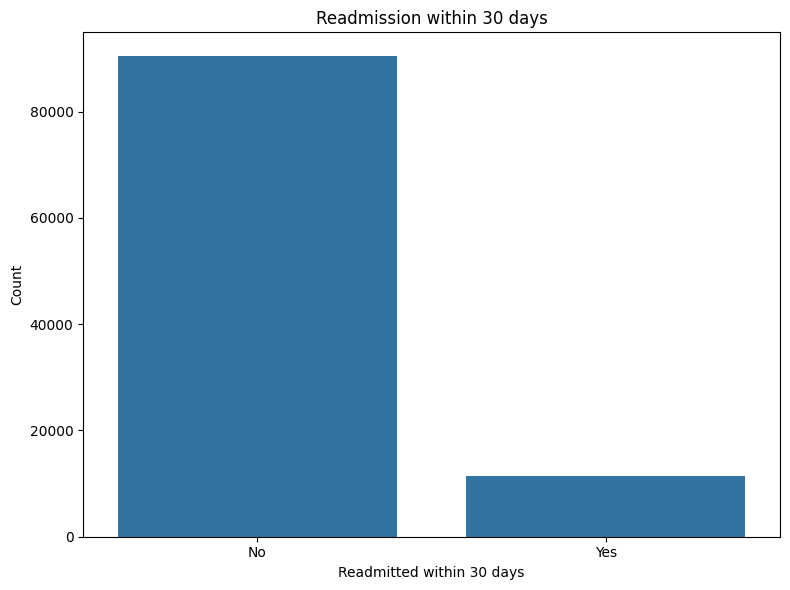

In [59]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(8,6))
sns.countplot(x=data_1['readmitted_within_30'])
plt.title('Readmission within 30 days')
plt.xlabel('Readmitted within 30 days')
plt.ylabel('Count')
plt.xticks([0,1],["No","Yes"])
plt.tight_layout()
plt.show()

a count plot to visualize the distribution of the target variable `readmitted_within_30`:

- **No**: Patients not readmitted within 30 days.
- **Yes**: Patients readmitted within 30 days.

This helps us see the class imbalance in the dataset.



- **11.1%** of patients were readmitted within 30 days.
- **0.02%** of these readmitted patients returned to the same hospital.

This provides insights into the overall readmission rate and the frequency of readmissions to the same healthcare facility.




This imbalance will affect model performance, and strategies like balancing or resampling may be needed.


**Demographics Feature** 

Age distribution

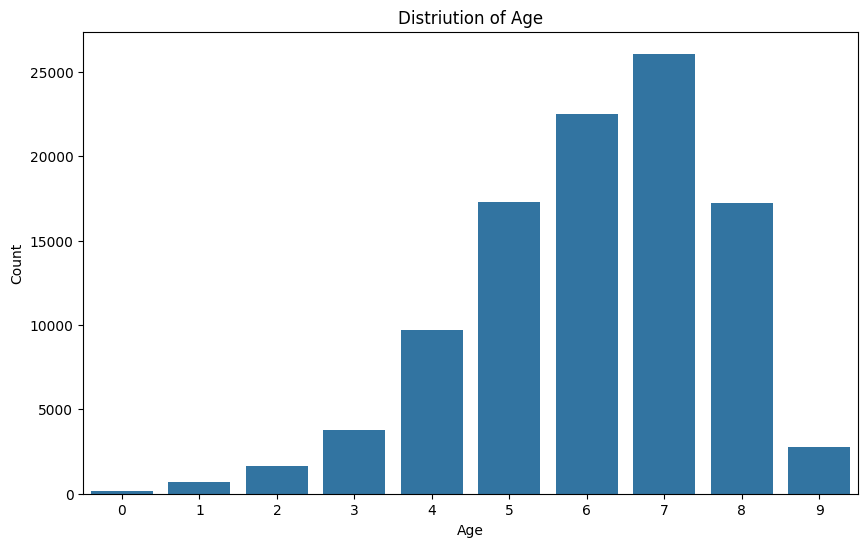

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(x=data_1["age_ordinal"])
plt.title("Distriution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

a count plot for the `age_ordinal` feature, which shows the distribution of patients across different age groups.

This distribution helps us understand how the age factor is spread across the dataset.


 Gender distribution

In [61]:
gender_count = data_1["gender"].value_counts()
gender_count

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [62]:
invalid_gender= data_1["gender"].isin(["Unknown/Invalid"])
invalid_gender_rows = data_1[invalid_gender]
invalid_gender_rows

,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_emergency,...,insulin_up,insulin_down,insulin_none,readmitted_within_30,age_ordinal,inpatient_ordinal,age_inpatient_interaction,medications_used,medication_changed,high_risk_with_medication
30506,Other,Unknown/Invalid,[70-80),1,none,Cardiology,5,5,22,0,...,0,0,1,0,7,0,0,2,1,0
75551,none,Unknown/Invalid,[60-70),1,CP,none,38,1,6,0,...,0,0,1,0,6,0,0,0,0,0
82573,none,Unknown/Invalid,[70-80),8,CP,none,59,2,21,0,...,0,0,1,0,7,0,0,2,1,0



Since the `"Unknown/Invalid"` gender values do not contribute to readmission analysis, excluded
 them from the dataset to ensure the analysis focuses only on relevant data.


In [63]:
data_1=data_1[~invalid_gender].copy()

In [64]:
gender_count=data_1["gender"].value_counts()
gender_count

gender
Female    54708
Male      47055
Name: count, dtype: int64

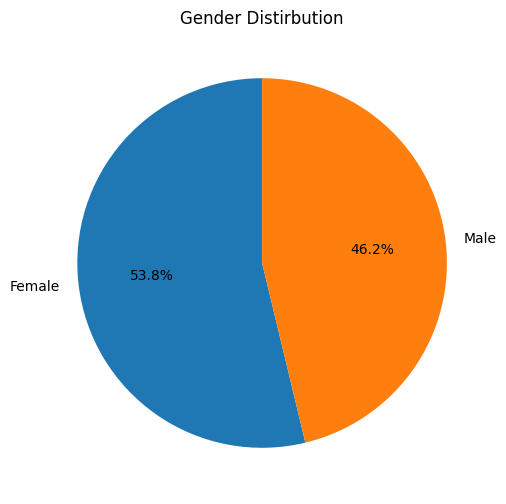

In [65]:
plt.figure(figsize=(10,6))
plt.pie(gender_count,labels=gender_count.index,autopct='%1.1f%%',startangle=90)
plt.title("Gender Distirbution")
plt.show()

Race Distribution 

In [66]:
race_count=data_1["race"].value_counts()
race_count

race
Caucasian          76099
AfricanAmerican    19210
none                2271
Hispanic            2037
Other               1505
Asian                641
Name: count, dtype: int64

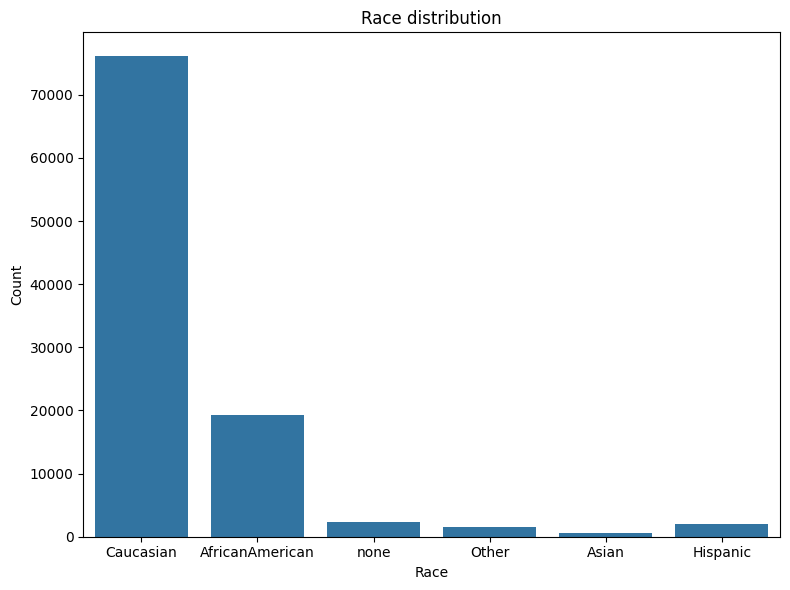

In [67]:
plt.figure(figsize=(8,6))
sns.countplot(x=data_1["race"])
plt.title("Race distribution")
plt.xlabel("Race")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Visit Types

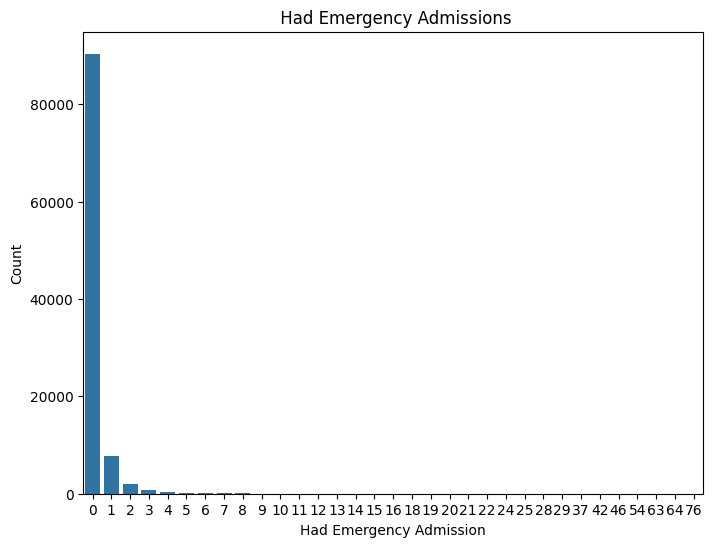

In [68]:
plt.figure(figsize=(8,6))
sns.countplot(x=data_1["number_emergency"])
plt.title(" Had Emergency Admissions")
plt.xlabel("Had Emergency Admission")
plt.ylabel("Count")
plt.xticks()
plt.show()

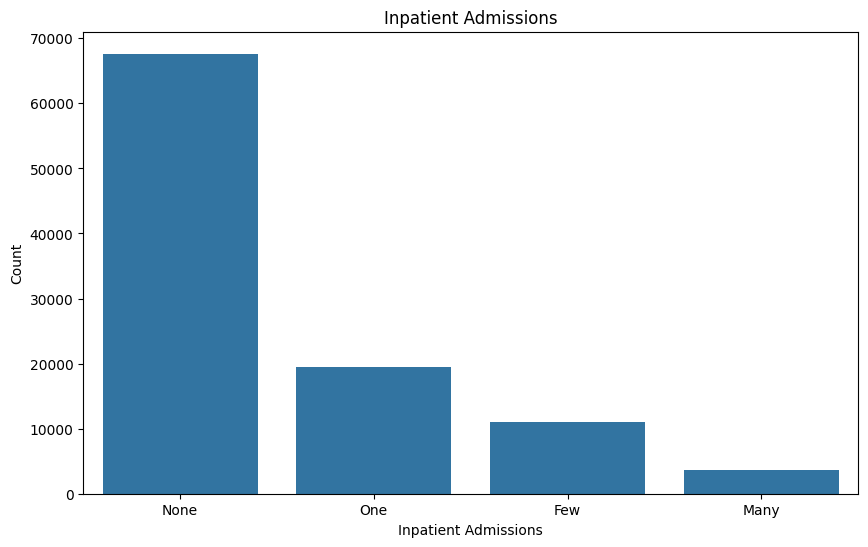

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(x=data_1["inpatient_category"])
plt.title("Inpatient Admissions")
plt.xlabel("Inpatient Admissions")
plt.ylabel("Count")
plt.show()

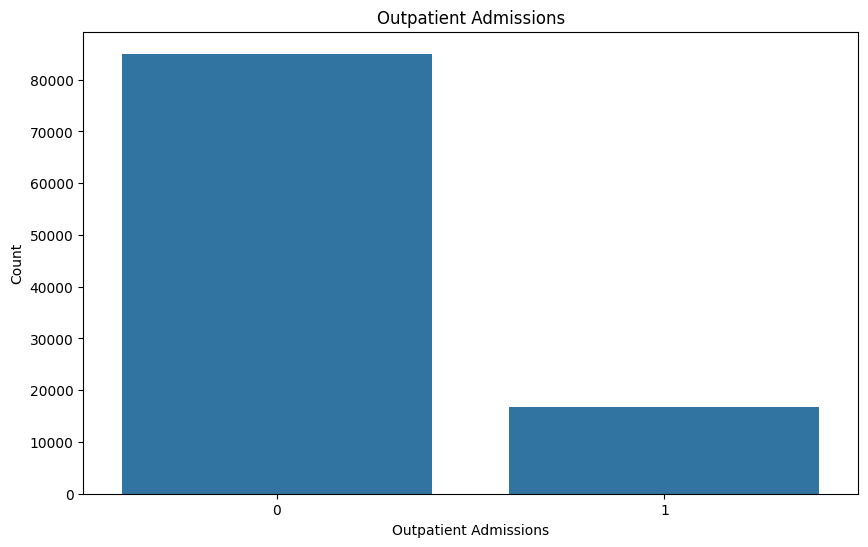

In [70]:
plt.figure(figsize=(10,6))
sns.countplot(x=data_1["had_outpatient"])
plt.title("Outpatient Admissions")
plt.xlabel("Outpatient Admissions")
plt.ylabel("Count")
plt.show()

Clinical and Risk Features

High Risk Diagnosis

C:\Users\shrut\AppData\Local\Temp\ipykernel_29816\1773056284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_1["any_high_risk_diagnosis"],palette='Set2')


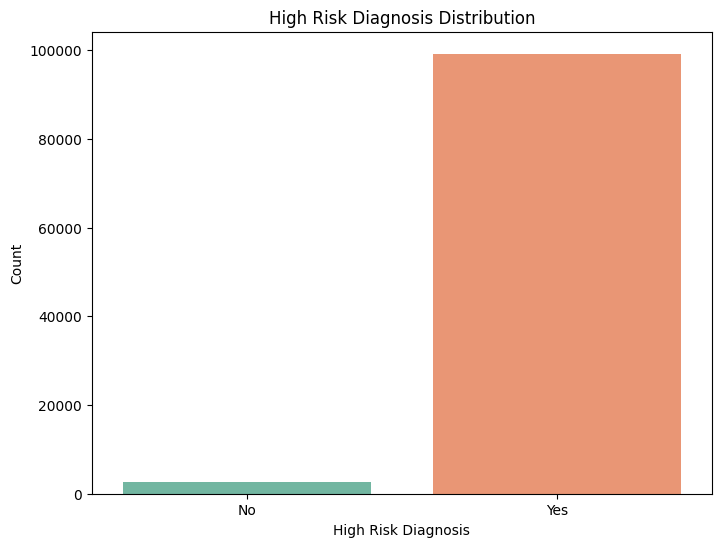

In [72]:
plt.figure(figsize=(8,6))
sns.countplot(x=data_1["any_high_risk_diagnosis"],palette='Set2')
plt.title("High Risk Diagnosis Distribution")
plt.xlabel("High Risk Diagnosis")
plt.ylabel("Count")
plt.xticks([0,1],["No","Yes"])
plt.show()

Medication Taken

C:\Users\shrut\AppData\Local\Temp\ipykernel_29816\4105087308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_1["diabetesMedication"],palette='Set2')


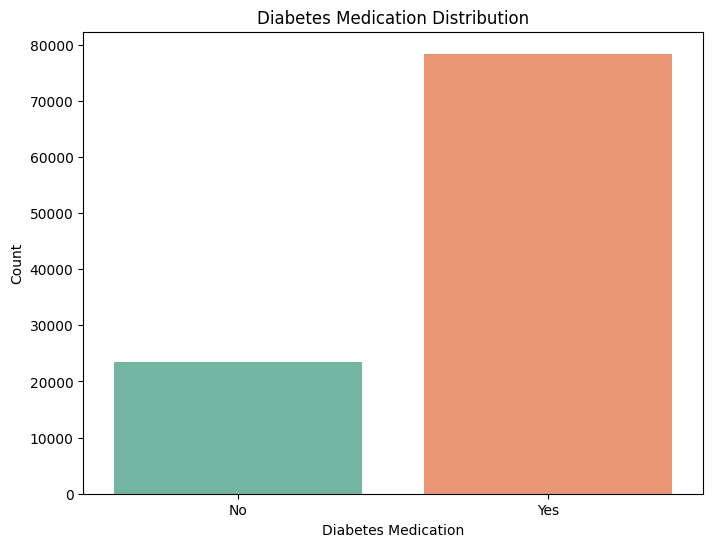

In [73]:
plt.figure(figsize=(8,6))
sns.countplot(x=data_1["diabetesMedication"],palette='Set2')
plt.title("Diabetes Medication Distribution")
plt.xlabel("Diabetes Medication")
plt.ylabel("Count")
plt.xticks([0,1],["No","Yes"])
plt.show()

Insulin Usage

C:\Users\shrut\AppData\Local\Temp\ipykernel_29816\3336951014.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_1[var], ax=axes[i], palette=['#66c2a5', colors[i]])
C:\Users\shrut\AppData\Local\Temp\ipykernel_29816\3336951014.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_1[var], ax=axes[i], palette=['#66c2a5', colors[i]])
C:\Users\shrut\AppData\Local\Temp\ipykernel_29816\3336951014.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_1[var], ax=axes[i], palette=['#66c2a5', colors[i]])
C:\Users\shrut\AppData

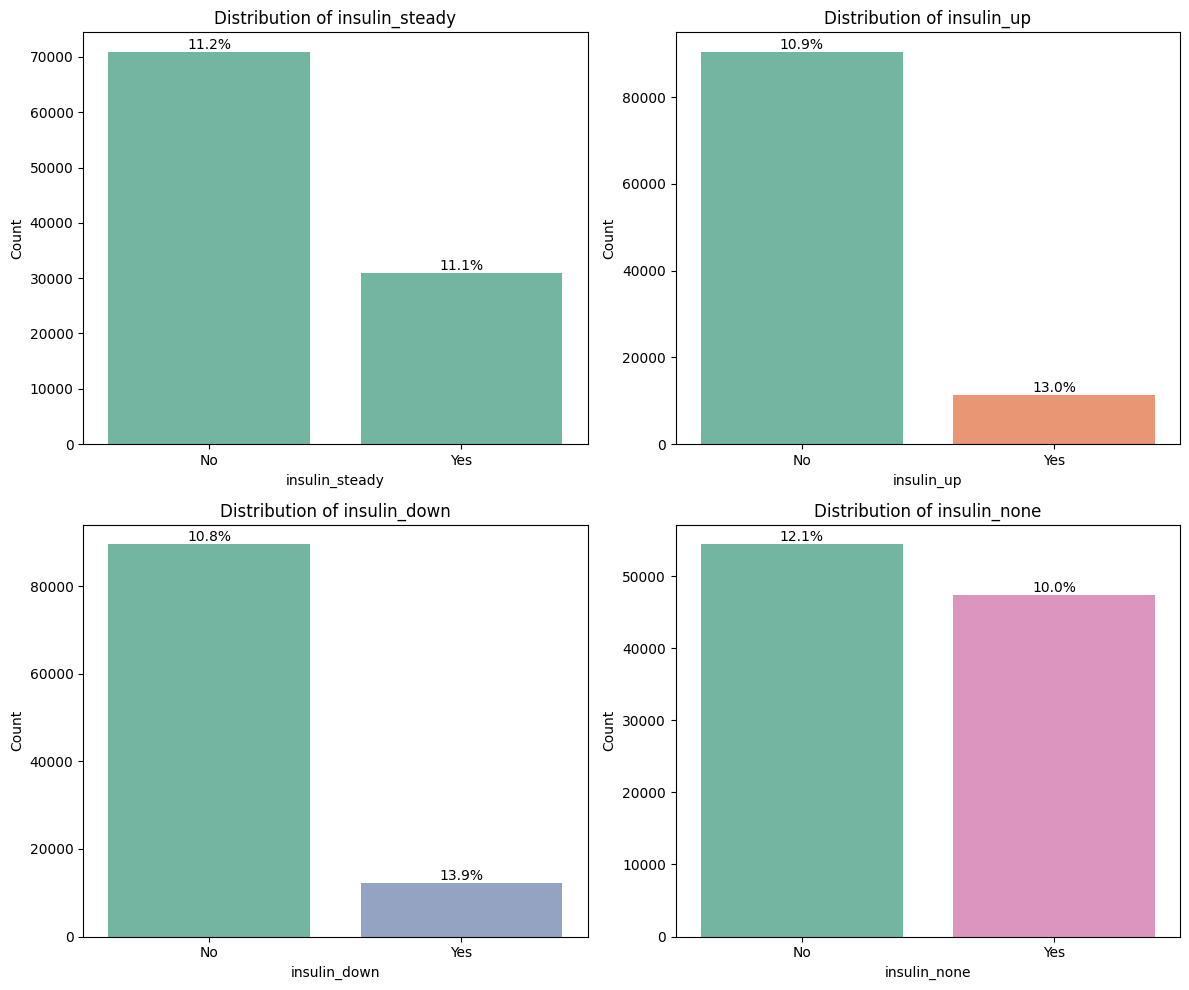

<Figure size 1000x600 with 0 Axes>

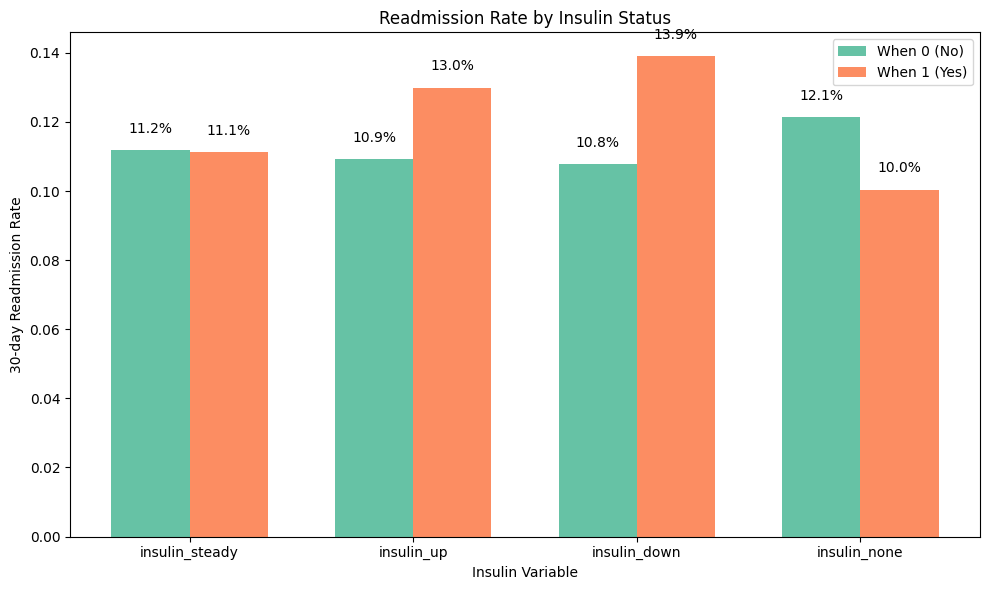

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()


insulin_vars = ['insulin_steady', 'insulin_up', 'insulin_down', 'insulin_none']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

for i, var in enumerate(insulin_vars):
    
    sns.countplot(x=data_1[var], ax=axes[i], palette=['#66c2a5', colors[i]])
    readmission_rates = data_1.groupby(var)['readmitted_within_30'].mean()
    
    for j, p in enumerate(axes[i].patches):
        if j < len(readmission_rates):
            rate = readmission_rates.iloc[j]
            axes[i].annotate(f'{rate:.1%}', 
                          (p.get_x() + p.get_width()/2., p.get_height()), 
                          ha='center', va='bottom')
    
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

    if len(axes[i].get_xticks()) == 2:
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
insulin_results = []

for var in insulin_vars:

    rates = data_1.groupby(var)['readmitted_within_30'].mean()
    if 0 in rates.index and 1 in rates.index:
        insulin_results.append({
            'variable': var,
            'rate_when_0': rates[0],
            'rate_when_1': rates[1],
            'difference': rates[1] - rates[0]
        })


result_df = pd.DataFrame(insulin_results)

plt.figure(figsize=(10, 6))
x = np.arange(len(result_df))
width = 0.35

plt.bar(x - width/2, result_df['rate_when_0'], width, label='When 0 (No)', color='#66c2a5')
plt.bar(x + width/2, result_df['rate_when_1'], width, label='When 1 (Yes)', color='#fc8d62')

plt.xlabel('Insulin Variable')
plt.ylabel('30-day Readmission Rate')
plt.title('Readmission Rate by Insulin Status')
plt.xticks(x, result_df['variable'])
plt.legend()

for i, row in enumerate(result_df.itertuples()):
    plt.text(i - width/2, row.rate_when_0 + 0.005, f'{row.rate_when_0:.1%}', ha='center')
    plt.text(i + width/2, row.rate_when_1 + 0.005, f'{row.rate_when_1:.1%}', ha='center')
    
plt.tight_layout()
plt.show()

In [75]:
data_1['insulin_used'] = (
    data_1['insulin_up'] | data_1['insulin_down'] 
).astype(int)


In [76]:
data_1.drop(['insulin_up','insulin_down','insulin_up','insulin_steady'],axis=1,inplace=True)

Distibution of Lab Results

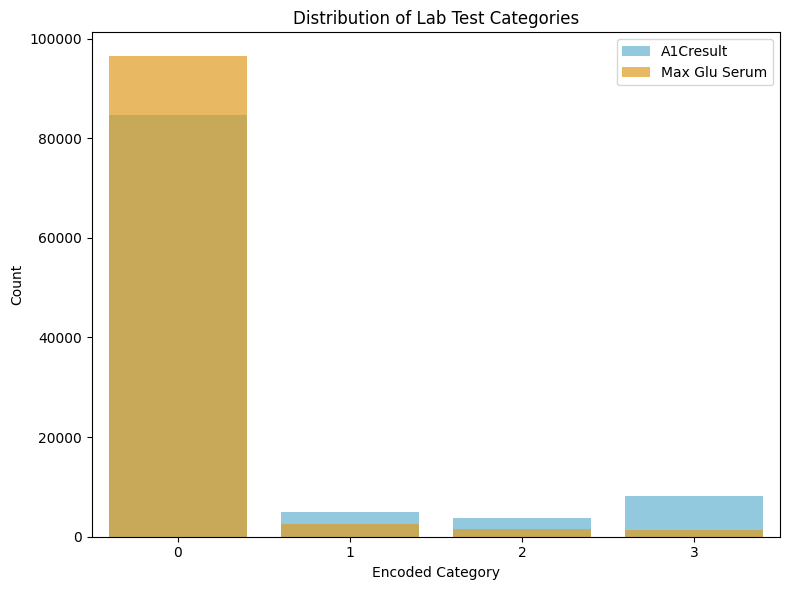

In [ ]:
a1c_counts = data_1['A1Cresult'].value_counts().sort_index()
glu_counts = data_1['max_glu_serum'].value_counts().sort_index()

lab_df = pd.DataFrame({
    'A1Cresult': a1c_counts,
    'max_glu_serum': glu_counts
}).T

plt.figure(figsize=(8, 6))
sns.barplot(x=lab_df.columns.astype(str), y=lab_df.loc['A1Cresult'], label='A1Cresult', color='skyblue')
sns.barplot(x=lab_df.columns.astype(str), y=lab_df.loc['max_glu_serum'], label='Max Glu Serum', color='orange', alpha=0.7)

plt.title('Distribution of Lab Test Categories')
plt.ylabel('Count')
plt.xlabel('Encoded Category')
plt.legend()
plt.tight_layout()
plt.show()


 Administrative Data

Admission Types

C:\Users\shrut\AppData\Local\Temp\ipykernel_29816\3345449182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=admission_counts.index, y=admission_counts.values,palette='Set3')


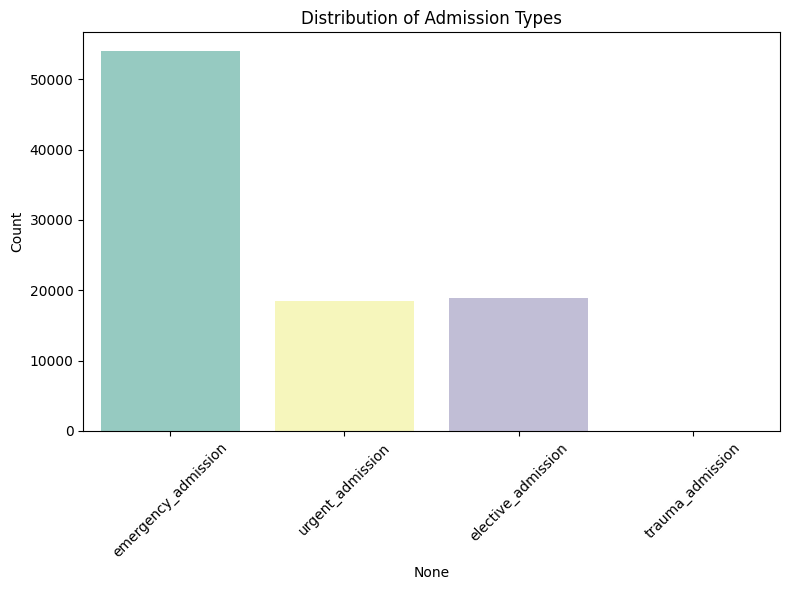

In [78]:
admission_counts = data_1[['emergency_admission', 'urgent_admission', 'elective_admission','trauma_admission']].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=admission_counts.index, y=admission_counts.values,palette='Set3')
plt.title('Distribution of Admission Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Length of Stay in Hospital

C:\Users\shrut\AppData\Local\Temp\ipykernel_29816\2153631134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_1["time_in_hospital"],palette='Set2')


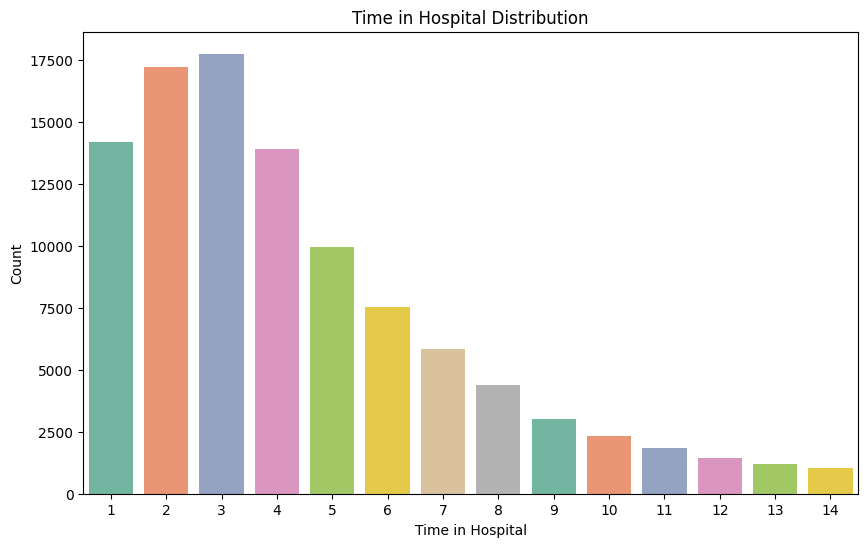

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(x=data_1["time_in_hospital"],palette='Set2')
plt.title("Time in Hospital Distribution")
plt.xlabel("Time in Hospital")  
plt.ylabel("Count")
plt.show()

C:\Users\shrut\AppData\Local\Temp\ipykernel_29816\1850834193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_1["discharged_home"],palette='Set2')


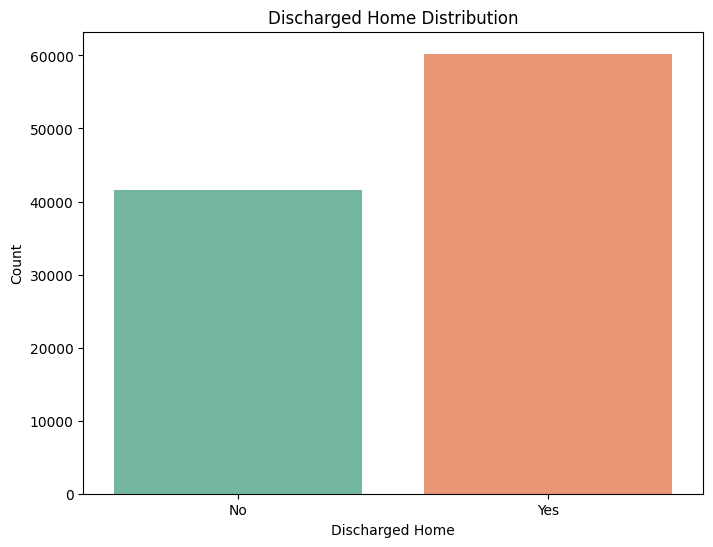

In [80]:
plt.figure(figsize=(8,6))
sns.countplot(x=data_1["discharged_home"],palette='Set2')
plt.title("Discharged Home Distribution")
plt.xlabel("Discharged Home")
plt.ylabel("Count")
plt.xticks([0,1],["No","Yes"])
plt.show()

In [81]:
count_left_aaginst_advice = data_1['left_against_advice'].value_counts()
count_left_aaginst_advice

left_against_advice
0    101140
1       623
Name: count, dtype: int64

### EDA Summary

- Target variable (`readmitted_within_30`) is imbalanced (~11.1% positive class).
- Demographics (age, gender, race) explored with proper cleaning (e.g., removed 'Unknown/Invalid' gender).
- Visualized hospital resource usage: emergency, inpatient, outpatient.
- Clinical insights from lab tests, medications, and diagnosis risk categories.
- Discharge and admission types analyzed.
- Distribution of stay duration and discharge decisions (e.g., left against advice).



In [82]:
data_1.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone',
       'high_risk_diabetes', 'any_high_risk_diagnosis', 'inpatient_category',
       'had_outpatient', 'emergency_admission', 'urgent_admission',
       'elective_admission', 'newborn_admission', 'trauma_admission',
       'discharged_home', 'discharged_to_facility',
       'discharged_with_home_health', 'left_against_advice'

### Step 1: Binary Feature Evaluation


⚠️ Error processing acetohexamide: unsupported operand type(s) for /: 'str' and 'int'
⚠️ Error processing tolbutamide: unsupported operand type(s) for /: 'str' and 'int'
⚠️ Error processing troglitazone: unsupported operand type(s) for /: 'str' and 'int'
⚠️ Error processing glipizide-metformin: unsupported operand type(s) for /: 'str' and 'int'
⚠️ Error processing glimepiride-pioglitazone: unsupported operand type(s) for /: 'str' and 'int'
⚠️ Error processing metformin-rosiglitazone: unsupported operand type(s) for /: 'str' and 'int'
⚠️ Error processing metformin-pioglitazone: unsupported operand type(s) for /: 'str' and 'int'


C:\Users\shrut\AppData\Local\Temp\ipykernel_29816\2834266056.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  feature_importance = pd.concat([feature_importance, pd.DataFrame([{


📊 Binary Feature Readmission Comparison:


,Feature,Count_Yes,Percentage_Yes,Readmit_Rate_No,Readmit_Rate_Yes,Absolute_Difference
0,still_patient,3,0.00,11.16,66.67,55.51
1,discharged_within_institution,63,0.06,11.14,44.44,33.30
2,readmitted_same_hospital,21,0.02,11.15,42.86,31.70
3,patient_expired,1652,1.62,11.34,0.00,11.34
4,discharged_for_outpatient,25,0.02,11.16,0.00,11.16
5,neonate_transfer,6,0.01,11.16,0.00,11.16
6,trauma_admission,21,0.02,11.16,0.00,11.16
7,discharged_to_facility,20677,20.32,9.84,16.34,6.50
8,discharged_to_hospice,771,0.76,11.20,5.58,5.63
9,discharged_home,60232,59.19,13.86,9.30,4.56


<Figure size 1200x800 with 0 Axes>

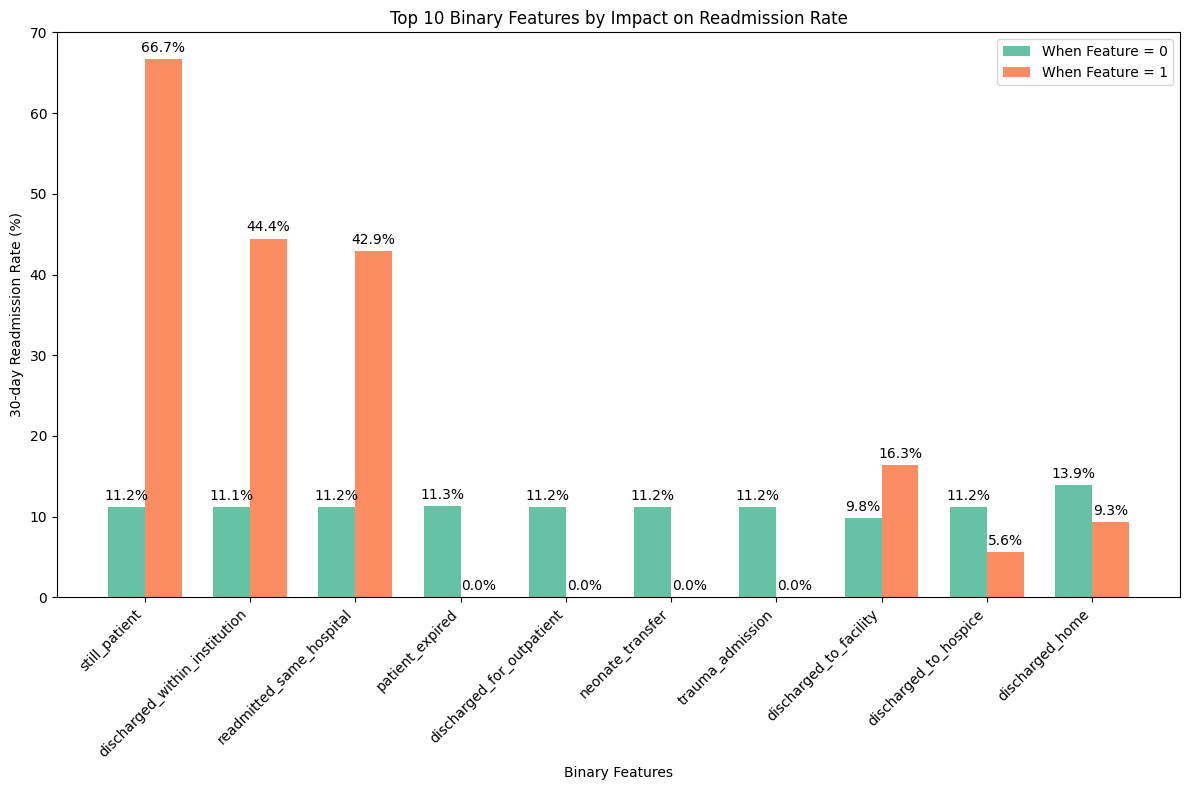

In [ ]:
binary_features = [col for col in data_1.columns if data_1[col].nunique() == 2 and col != 'readmitted_within_30']

binary_features = [col for col in binary_features if col not in ['gender', 'change']]

feature_importance = pd.DataFrame(columns=[
    'Feature', 'Count_Yes', 'Percentage_Yes',
    'Readmit_Rate_No', 'Readmit_Rate_Yes', 'Absolute_Difference'
])

for feature in binary_features:
    try:
        
        readmission_rates = data_1.groupby(feature)['readmitted_within_30'].mean() * 100
        readmit_rate_no = readmission_rates.iloc[0]
        readmit_rate_yes = readmission_rates.iloc[1]
        difference = abs(readmit_rate_yes - readmit_rate_no)

        count_yes = data_1[feature].sum()
        percentage_yes = (count_yes / len(data_1)) * 100

        feature_importance = pd.concat([feature_importance, pd.DataFrame([{
            'Feature': feature,
            'Count_Yes': int(count_yes),
            'Percentage_Yes': round(percentage_yes, 2),
            'Readmit_Rate_No': round(readmit_rate_no, 2),
            'Readmit_Rate_Yes': round(readmit_rate_yes, 2),
            'Absolute_Difference': round(difference, 2)
        }])], ignore_index=True)

    except Exception as e:
        print(f"Error processing {feature}: {e}")


feature_importance.sort_values(by='Absolute_Difference', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)

print("Binary Feature Readmission Comparison:")
display(feature_importance)


plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)['Feature'].tolist()
top_diff_no = top_features.copy()
top_diff_yes = top_features.copy()

plot_data = []
for feature in top_features:
    row = feature_importance[feature_importance['Feature'] == feature].iloc[0]
    plot_data.append({
        'Feature': feature,
        'No': row['Readmit_Rate_No'],
        'Yes': row['Readmit_Rate_Yes']
    })

plot_df = pd.DataFrame(plot_data)

x = np.arange(len(plot_df))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, plot_df['No'], width, label='When Feature = 0', color='#66c2a5')
rects2 = ax.bar(x + width/2, plot_df['Yes'], width, label='When Feature = 1', color='#fc8d62')

ax.set_xlabel('Binary Features')
ax.set_ylabel('30-day Readmission Rate (%)')
ax.set_title('Top 10 Binary Features by Impact on Readmission Rate')
ax.set_xticks(x)
ax.set_xticklabels(plot_df['Feature'], rotation=45, ha='right')
ax.legend()

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3), 
                   textcoords="offset points",
                   ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()

#### Binary Feature Evaluation
the impact of binary features on 30-day readmission rates. For each binary feature:
- calculated the prevalence (percentage of patients with value 1).
- calculated the readmission rates for both values of the feature (0 and 1).
- The **absolute difference** between the two readmission rates is used to rank the features.

The top 10 binary features with the largest impact on readmission rates are visualized in a bar chart, showing how the presence or absence of each feature influences the likelihood of readmission.


In [ ]:
drop_binary_features = drop_binary_features = [
    'still_patient', 'patient_expired',
    'discharged_within_institution', 'discharged_for_outpatient', 'neonate_transfer',
     'newborn_admission','provider_referral'
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone',
    'miglitol', 'troglitazone', 'tolazamide', 'examide',
    'citoglipton', 'glipizide-metformin', 'glyburide-metformin',
    'metformin-rosiglitazone', 'metformin-pioglitazone',
    'glimepiride-pioglitazone',
    'acetohexamide_used', 'metformin-pioglitazone_used', 'metformin-rosiglitazone_used',
    'glimepiride-pioglitazone_used', 'troglitazone_used', 'tolbutamide_used',
    'chlorpropamide_used', 'glipizide-metformin_used', 'tolazamide_used',
    'miglitol_used', 'nateglinide_used', 'glyburide-metformin_used',
'insulin_steady', 'insulin_up', 'insulin_down', 'insulin_none','gender','provider_referral'

]



data_1.drop(columns=drop_binary_features, inplace=True, errors='ignore')



We identify and remove irrelevant binary features and features with low impact on model performance. These include:
- Irrelevant columns like `still_patient`, `patient_expired`.
- Original medication columns and their binary counterparts like `metformin`, `insulin_steady`, etc.
- Gender, which is already analyzed.

This process helps clean the dataset and focus on the most impactful features for model training.


In [ ]:

binary_features = data_1.columns[(data_1.nunique() == 2) & (data_1.columns != 'readmitted_within_30')]
binary_features


Index(['high_risk_diabetes', 'any_high_risk_diagnosis', 'had_outpatient',
       'emergency_admission', 'urgent_admission', 'elective_admission',
       'trauma_admission', 'discharged_home', 'discharged_to_facility',
       'discharged_with_home_health', 'left_against_advice',
       'readmitted_same_hospital', 'discharged_to_hospice',
       'transfer_from_facility', 'from_emergency_room', 'from_law_enforcement',
       'diabetesMedication', 'medication_changed', 'high_risk_with_medication',
       'insulin_used'],
      dtype='object')

#### Re-identifying Binary Features
After removing irrelevant and low-impact binary features, re-identify the remaining binary features that have exactly two unique values. The target variable `readmitted_within_30` is excluded from this list.


📊 Top Numerical Features by Correlation with Readmission:


,Feature,Mean_No_Readmit,Mean_Readmit,Absolute_Difference,Percent_Difference,Correlation
0,number_inpatient,0.56,1.22,0.66,117.92,0.1651
1,inpatient_ordinal,0.47,0.87,0.40,85.39,0.1532
2,age_inpatient_interaction,2.88,5.13,2.25,78.11,0.1371
3,number_emergency,0.18,0.36,0.18,100.95,0.0607
4,number_diagnoses,7.39,7.69,0.30,4.12,0.0495
5,time_in_hospital,4.35,4.77,0.42,9.63,0.0442
6,num_medications,15.91,16.90,0.99,6.23,0.0384
7,num_lab_procedures,42.95,44.23,1.27,2.96,0.0204
8,age_ordinal,6.09,6.18,0.09,1.47,0.0176
9,A1Cresult,0.37,0.32,0.05,12.74,-0.0168


C:\Users\shrut\AppData\Local\Temp\ipykernel_29816\2916750999.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations, y=top_features, palette=colors)


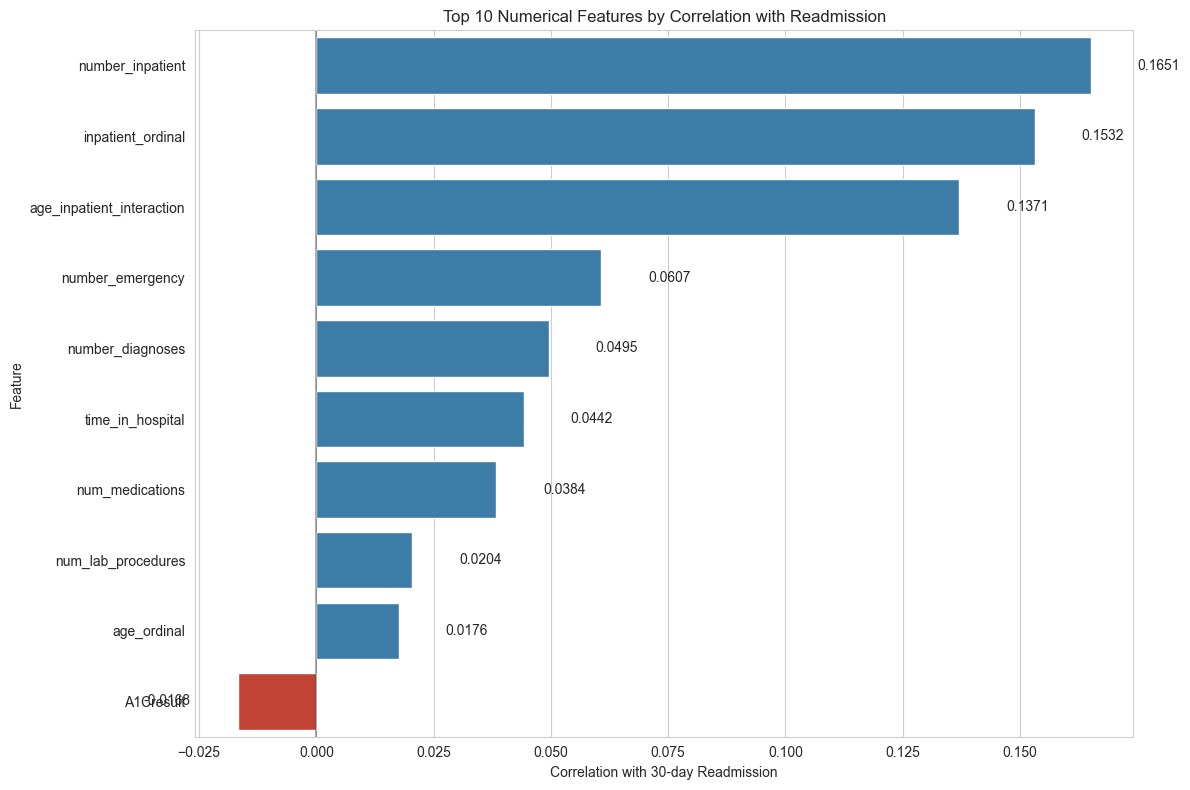

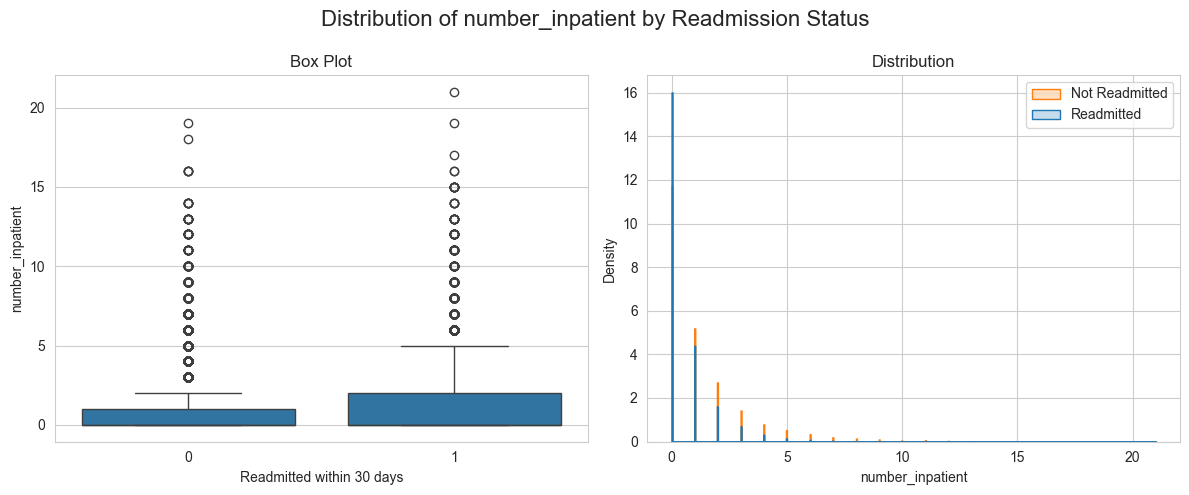

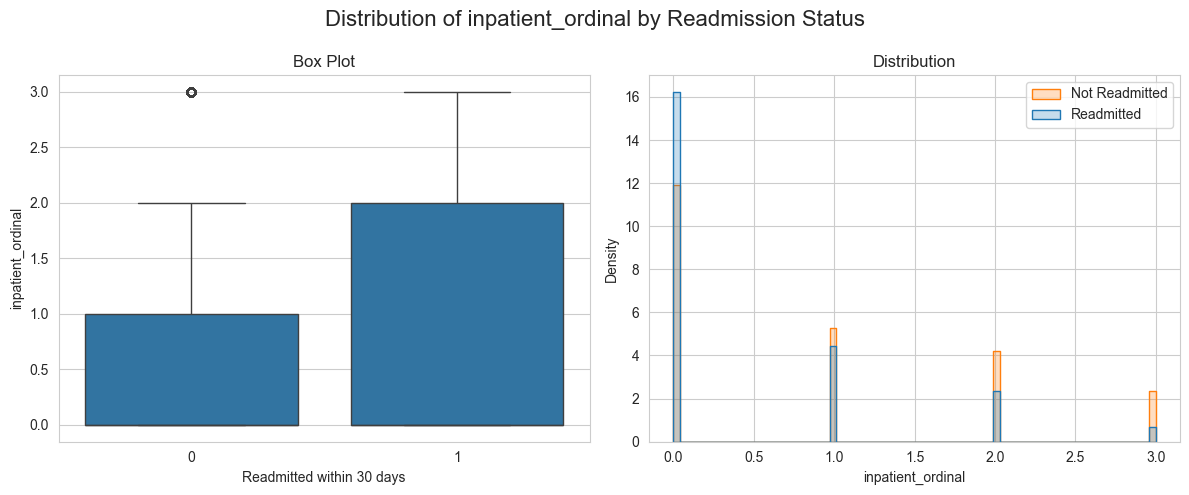

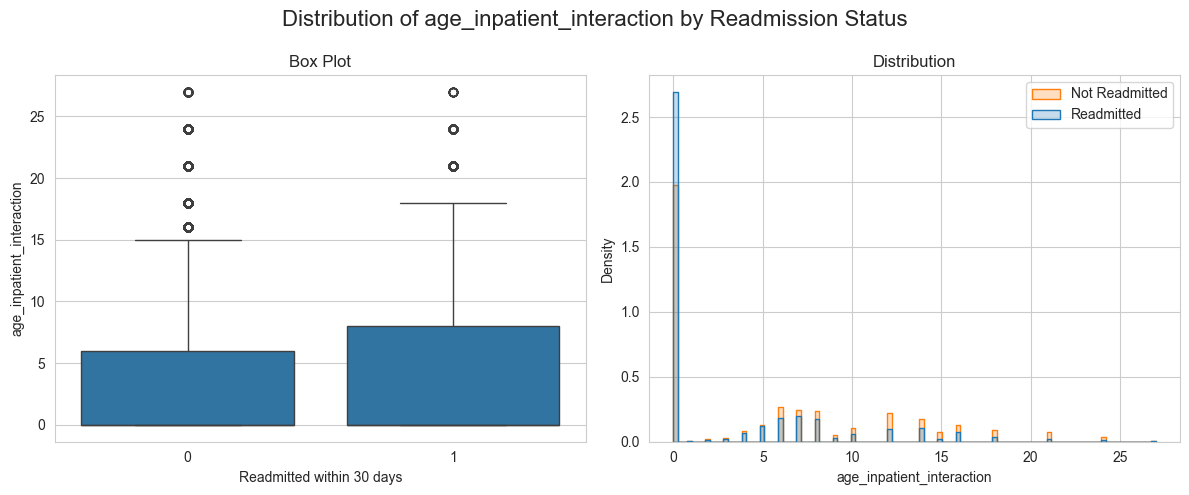

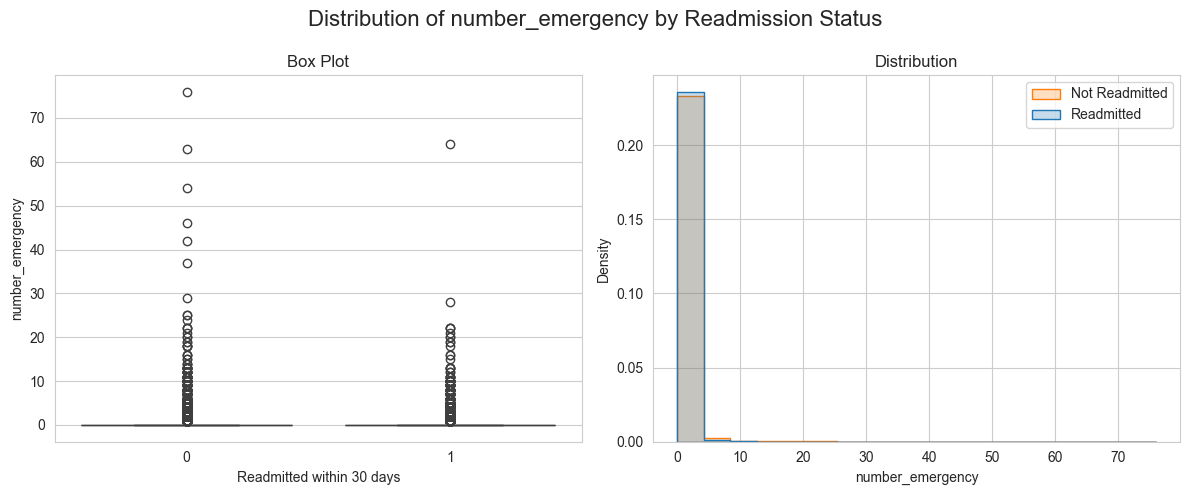

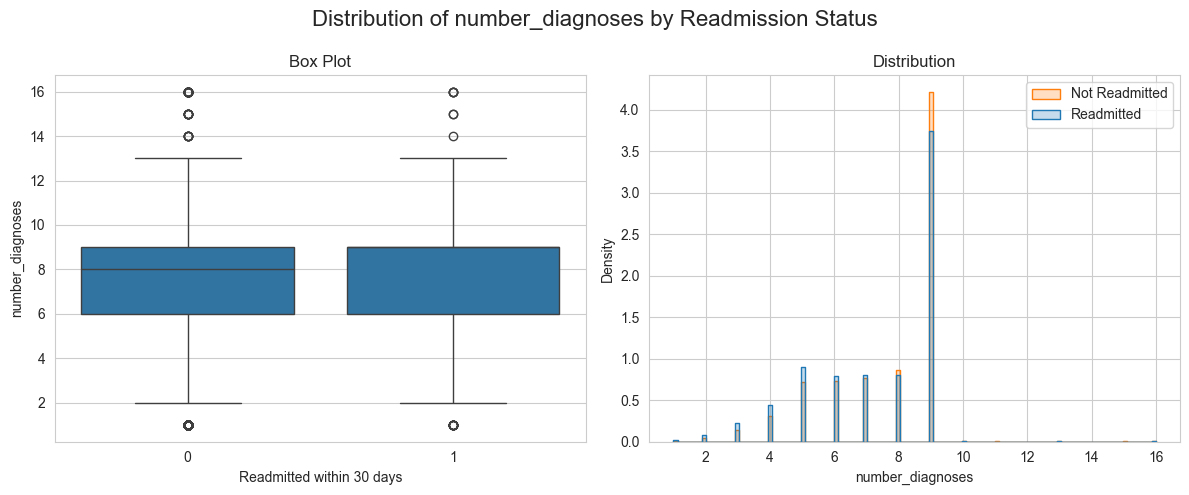

In [ ]:
from scipy import stats

numerical_features = data_1.select_dtypes(include=['int64', 'float64']).columns
numerical_features = [
    col for col in numerical_features 
    if col not in ['readmitted_within_30', 'encounter_id', 'patient_nbr'] 
    and data_1[col].nunique() > 2
]


numerical_importance = pd.DataFrame(columns=[
    'Feature', 'Mean_No_Readmit', 'Mean_Readmit',
    'Absolute_Difference', 'Percent_Difference', 'Correlation'
])


for feature in numerical_features:
    try:
        # means by readmission status
        means = data_1.groupby('readmitted_within_30')[feature].mean()
        mean_no = means.get(0, 0)
        mean_yes = means.get(1, 0)
        abs_diff = abs(mean_yes - mean_no)
        percent_diff = (abs_diff / mean_no * 100) if mean_no != 0 else 0
        
        # correlation
        correlation = data_1[feature].corr(data_1['readmitted_within_30'])
        
        # t-test
        readmit = data_1[data_1['readmitted_within_30'] == 1][feature]
        no_readmit = data_1[data_1['readmitted_within_30'] == 0][feature]
        t_stat, p_value = stats.ttest_ind(readmit, no_readmit, equal_var=False)

        numerical_importance.loc[len(numerical_importance)] = [
            feature,
            round(mean_no, 2),
            round(mean_yes, 2),
            round(abs_diff, 2),
            round(percent_diff, 2),
            round(correlation, 4)
        ]
    
    except Exception as e:
        print(f"Error processing '{feature}': {e}")

numerical_importance['Abs_Correlation'] = numerical_importance['Correlation'].abs()
numerical_importance.sort_values(by='Abs_Correlation', ascending=False, inplace=True)
numerical_importance.drop('Abs_Correlation', axis=1, inplace=True)
numerical_importance.reset_index(drop=True, inplace=True)

print("Top Numerical Features by Correlation with Readmission:")
display(numerical_importance)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

top_features = numerical_importance.head(10)['Feature'].tolist()
correlations = numerical_importance.head(10)['Correlation'].values

colors = ['#2c7fb8' if c > 0 else '#d7301f' for c in correlations]
sns.barplot(x=correlations, y=top_features, palette=colors)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Correlation with 30-day Readmission')
plt.ylabel('Feature')
plt.title('Top 10 Numerical Features by Correlation with Readmission')

for i, v in enumerate(correlations):
    plt.text(v + (0.01 if v > 0 else -0.01), 
             i, 
             f"{v:.4f}", 
             va='center', 
             ha='left' if v > 0 else 'right')

plt.tight_layout()
plt.show()


for feature in top_features[:5]: 
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Distribution of {feature} by Readmission Status', fontsize=16)
    
  
    plt.subplot(1, 2, 1)
    sns.boxplot(x='readmitted_within_30', y=feature, data=data_1)
    plt.xlabel('Readmitted within 30 days')
    plt.ylabel(feature)
    plt.title('Box Plot')
    
  
    plt.subplot(1, 2, 2)
    sns.histplot(data=data_1, x=feature, hue='readmitted_within_30', 
                 element='step', common_norm=False, stat='density')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title('Distribution')
    plt.legend(['Not Readmitted', 'Readmitted'])
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


In this step,  the relationship between numerical features and 30-day readmission rates (`readmitted_within_30`).
- **Mean values** for both readmitted (1) and non-readmitted (0) patients are calculated for each feature.
- **Absolute and percentage differences** are computed to highlight the impact of each feature.
- **Correlation** between each feature and the readmission status is assessed.
- **T-tests** are performed to evaluate statistical significance.

The top 10 features with the highest correlation are visualized, and their distributions are compared using box plots and histograms.


In [ ]:
drop_numerical = [
    'inpatient_ordinal','num_procedures','medications_used','age_ordinal'
]

data_1.drop(columns=drop_numerical, inplace=True, errors='ignore')



removing numerical features that are either redundant or have low impact on the prediction. These include:
- `inpatient_ordinal`: Hospitalization categorization.
- `num_procedures`: Number of medical procedures.
- `medications_used`: Summed medication count.
- `age_ordinal`: Age categorized into bins.

By excluding these, the dataset and focus on more relevant variables.


In [88]:
numerical_features = data_1.select_dtypes(include=['int64', 'float64']).columns
numerical_features = [col for col in numerical_features if col not in ['readmitted_within_30']]
numerical_features


['time_in_hospital',
 'num_lab_procedures',
 'num_medications',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'age_inpatient_interaction']

📊 Categorical Feature Statistical Analysis:


,Feature,Num_Categories,Max_Rate,Min_Rate,Rate_Difference,Chi2,P_Value,Cramer_V,Significant
0,medical_specialty,73,50.00,0.00,50.00,345.53,2.312708e-37,0.0518,Yes
1,age,10,14.24,1.86,12.38,116.63,6.521792e-21,0.0325,Yes
2,payer_code,18,13.17,0.00,13.17,97.68,2.388096e-13,0.0282,Yes
3,metformin_converted,2,11.52,9.70,1.82,53.21,2.993374e-13,0.0227,Yes
4,race,6,11.29,8.28,3.01,25.76,9.920864e-05,0.0143,Yes
5,acarbose_converted,2,11.17,9.09,2.08,1.13,2.871049e-01,0.0011,No


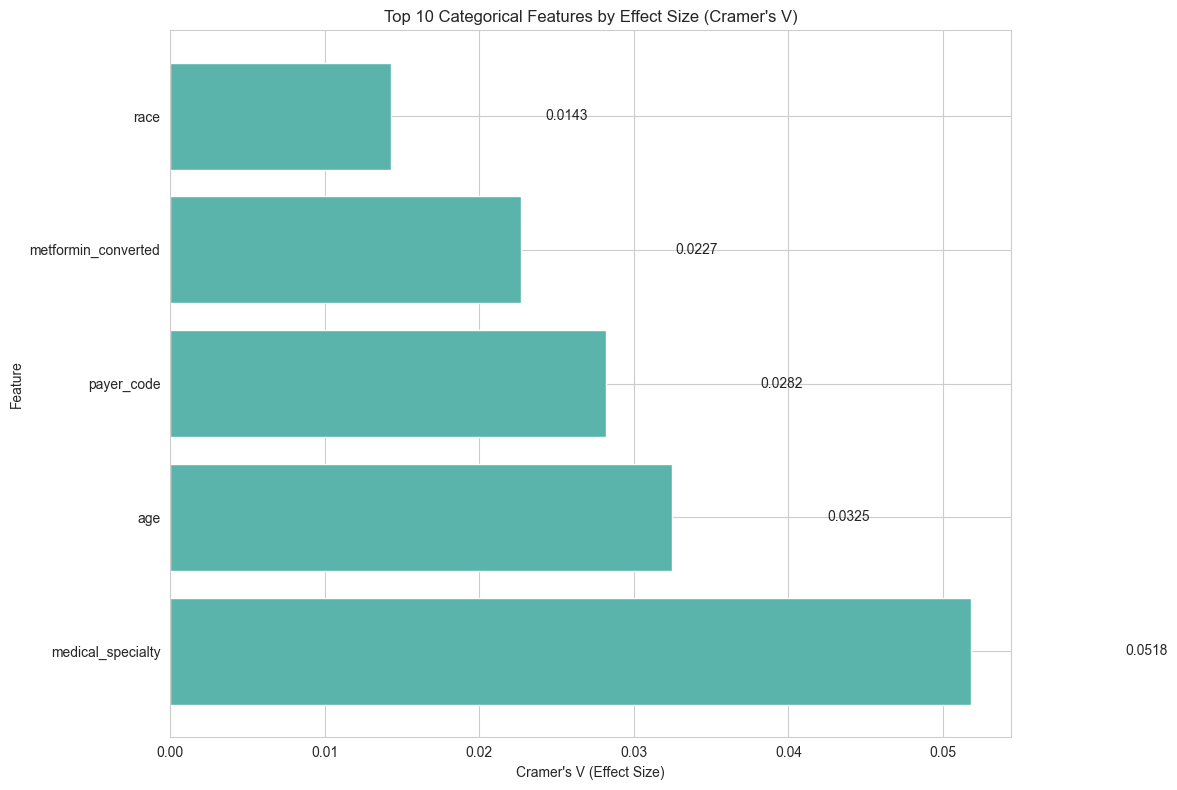

C:\Users\shrut\AppData\Local\Temp\ipykernel_29816\2233918885.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_df.index, y=rates_df['mean'], palette='Blues_d')
C:\Users\shrut\AppData\Local\Temp\ipykernel_29816\2233918885.py:119: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(f"n={rates_df['count'][i]}",


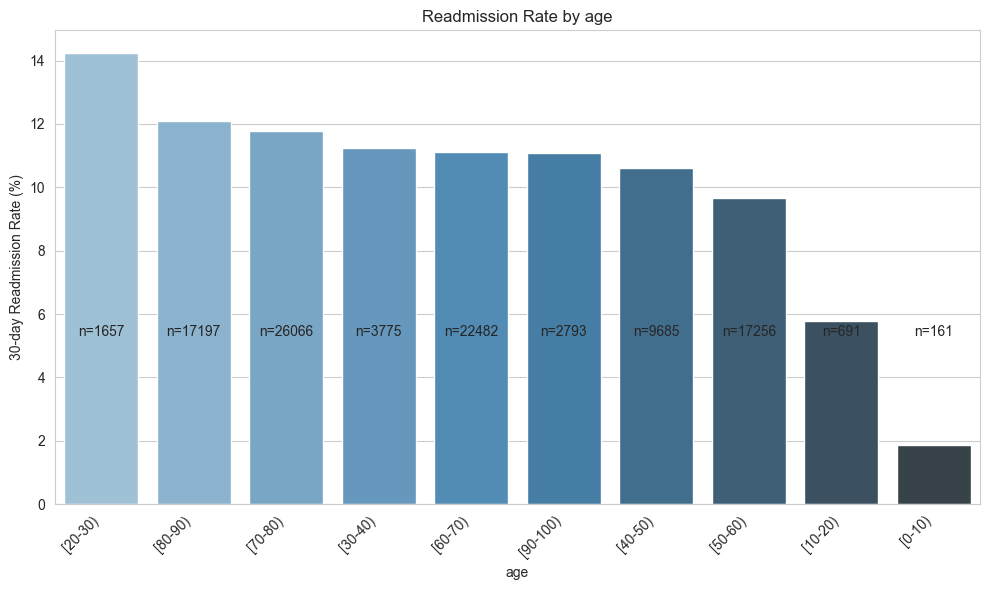

C:\Users\shrut\AppData\Local\Temp\ipykernel_29816\2233918885.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_df.index, y=rates_df['mean'], palette='Blues_d')


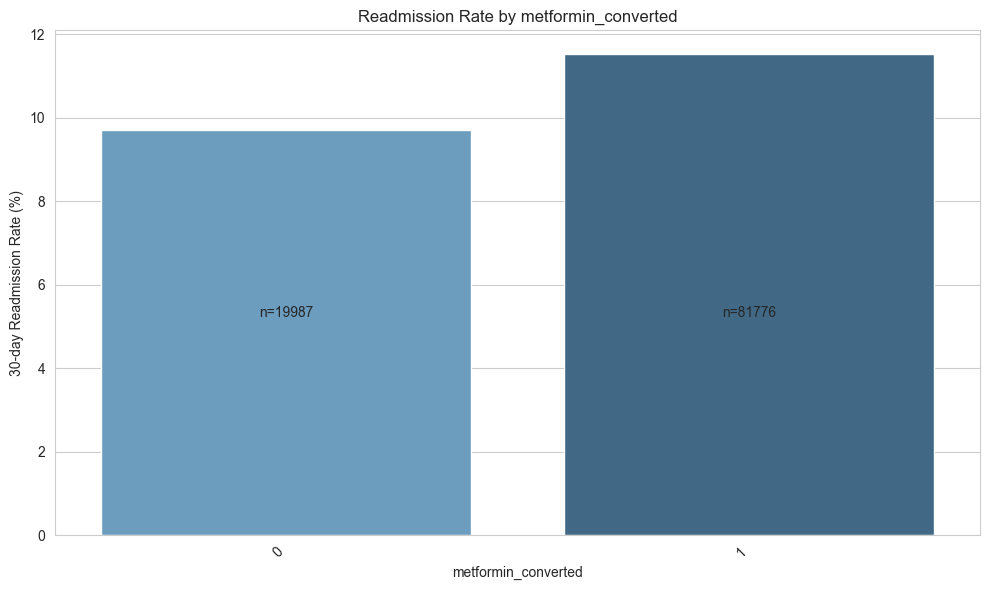

C:\Users\shrut\AppData\Local\Temp\ipykernel_29816\2233918885.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_df.index, y=rates_df['mean'], palette='Blues_d')
C:\Users\shrut\AppData\Local\Temp\ipykernel_29816\2233918885.py:119: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(f"n={rates_df['count'][i]}",


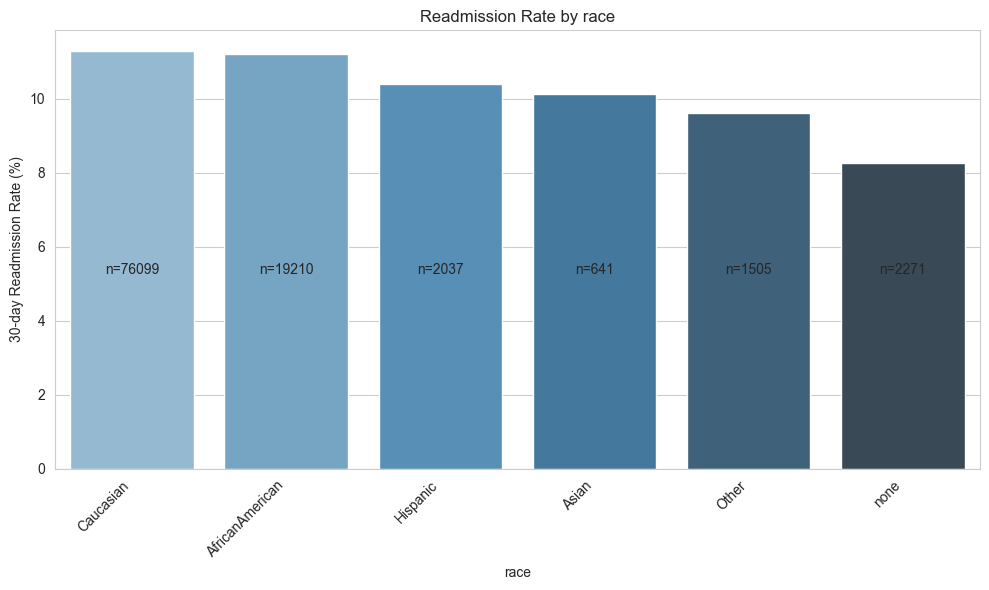

In [ ]:


categorical_features = data_1.select_dtypes(include=['object']).columns.tolist()
categorical_features = [col for col in categorical_features if col != 'readmitted_within_30']


med_columns = []
for col in categorical_features:
    if sorted(data_1[col].dropna().unique()) == ['Down', 'No', 'Steady', 'Up']:
        med_columns.append(col)

for col in med_columns:
    data_1[col + '_converted'] = data_1[col].apply(lambda x: 1 if x == 'No' else 0)

categorical_features = [
    col if col not in med_columns else col + '_converted'
    for col in categorical_features
]


categorical_importance = pd.DataFrame(columns=[
    'Feature', 'Num_Categories', 'Max_Rate', 'Min_Rate', 'Rate_Difference',
    'Chi2', 'P_Value', 'Cramer_V'
])

for feature in categorical_features:
    try:
      
        readmission_rates = data_1.groupby(feature)['readmitted_within_30'].mean() * 100
        max_rate = readmission_rates.max()
        min_rate = readmission_rates.min()
        rate_diff = max_rate - min_rate
       
        contingency = pd.crosstab(data_1[feature], data_1['readmitted_within_30'])
        chi2, p, _, _ = stats.chi2_contingency(contingency)
    
        n = contingency.sum().sum()
        phi2 = chi2 / n
        r, k = contingency.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1))) if min((kcorr-1), (rcorr-1)) > 0 else 0

        categorical_importance.loc[len(categorical_importance)] = [
            feature,
            len(readmission_rates),
            round(max_rate, 2),
            round(min_rate, 2),
            round(rate_diff, 2),
            round(chi2, 2),
            p,
            round(cramers_v, 4)
        ]
    
    except Exception as e:
        print(f"Error processing '{feature}': {e}")


categorical_importance['Significant'] = categorical_importance['P_Value'].apply(
    lambda p: 'Yes' if p < 0.05 else 'No'
)


categorical_importance.sort_values(by=['Significant', 'Cramer_V'], 
                                  ascending=[False, False], 
                                  inplace=True)
categorical_importance.reset_index(drop=True, inplace=True)


print("Categorical Feature Statistical Analysis:")
display(categorical_importance)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

top_cat_features = categorical_importance[
    categorical_importance['Significant'] == 'Yes'
].head(10)['Feature'].tolist()

top_cramers = categorical_importance[
    categorical_importance['Feature'].isin(top_cat_features)
]['Cramer_V'].values


plt.barh(top_cat_features, top_cramers, color='#5ab4ac')
plt.xlabel("Cramer's V (Effect Size)")
plt.ylabel('Feature')
plt.title('Top 10 Categorical Features by Effect Size (Cramer\'s V)')


for i, v in enumerate(top_cramers):
    plt.text(v + 0.01, i, f"{v:.4f}", va='center')

plt.tight_layout()
plt.show()


for feature in top_cat_features[:5]:  
    if data_1[feature].nunique() <= 10:  
        plt.figure(figsize=(10, 6))
        
  
        rates_df = data_1.groupby(feature)['readmitted_within_30'].agg(['mean', 'count'])
        rates_df['mean'] = rates_df['mean'] * 100 
        rates_df = rates_df.sort_values('mean', ascending=False)
        
 
        ax = sns.barplot(x=rates_df.index, y=rates_df['mean'], palette='Blues_d')
    
        for i, p in enumerate(ax.patches):
            ax.annotate(f"n={rates_df['count'][i]}", 
                      (p.get_x() + p.get_width()/2., 5),
                      ha='center', va='center',
                      xytext=(0, 10),
                      textcoords='offset points')
        
        plt.xlabel(feature)
        plt.ylabel('30-day Readmission Rate (%)')
        plt.title(f'Readmission Rate by {feature}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

#### Categorical Feature Evaluation and Visualization
In this step,the importance of categorical features in predicting readmissions:
- **Medication Columns**: Some medication columns are converted to binary (1 for use, 0 for non-use) to simplify analysis.
- **Chi-Square Test**: We compute the Chi-Square statistic for each categorical feature to test its association with the readmission target.
- **Cramer's V**: This measure is used to assess the strength of the association between categorical features and the target variable.

The **top categorical features** are visualized using a bar chart, highlighting those with the strongest association (highest Cramer's V). also plotted the **readmission rates** for the top features to visually assess how different categories relate to patient readmission.


In [ ]:

final_categorical_features = ['gender','race','age']

features_to_drop_categorical = ['change', 'payer_code','metformin','medical_specialty']
data_1.drop(columns=features_to_drop_categorical, inplace=True, errors='ignore')



We finalize the categorical features for the model:
- **Kept**: `gender`, `race`, and `age` are retained as they provide valuable insights into readmission prediction.
- **Dropped**: Features like `change`, `payer_code`, `metformin`, and `medical_specialty` were removed due to weak predictive power or redundancy.

The dataset is now ready for further model training, with the selected features optimized for predictive power.


In [91]:
categorical_features = data_1.select_dtypes(include=['object']).columns
categorical_features = [col for col in categorical_features if col != 'readmitted_within_30']
categorical_features


['race', 'age', 'acarbose']

In [ ]:
final_features = list(pd.Index(list(binary_features) + numerical_features + categorical_features).unique())


duplicates = data_1.columns[data_1.columns.duplicated()].tolist()
print("Duplicate columns:", duplicates)



🔁 Duplicate columns: []



We create a final list of features by combining binary, numerical, and categorical features. This list is used for model training. Any duplicate columns are removed to ensure that the data fed into the model is unique.

Additionally, we check for any duplicates in the columns, ensuring there is no redundancy that could affect model performance.


In [94]:
selected_columns = final_features + ['readmitted_within_30']
data_1 = data_1[selected_columns].copy()


In [158]:

data_1.to_csv('cleaned_data.csv', index=False)


#### Final Dataset Preparation
The final dataset by selecting the relevant features from the `final_features` list, as well as the target variable `readmitted_within_30`. This dataset is stored in `data_1` and is now ready for model training.


In [95]:
data_1

,high_risk_diabetes,any_high_risk_diagnosis,had_outpatient,emergency_admission,urgent_admission,elective_admission,trauma_admission,discharged_home,discharged_to_facility,discharged_with_home_health,...,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,age_inpatient_interaction,race,age,acarbose,readmitted_within_30
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,Caucasian,[0-10),No,0
1,0,1,0,1,0,0,0,1,0,0,...,0,0,9,0,0,0,Caucasian,[10-20),No,0
2,0,1,1,1,0,0,0,1,0,0,...,0,1,6,0,0,2,AfricanAmerican,[20-30),No,0
3,0,1,0,1,0,0,0,1,0,0,...,0,0,7,0,0,0,Caucasian,[30-40),No,0
4,0,1,0,1,0,0,0,1,0,0,...,0,0,5,0,0,0,Caucasian,[40-50),No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,0,1,0,0,0,0,1,0,...,0,0,9,0,3,0,AfricanAmerican,[70-80),No,0
101762,0,1,0,1,0,0,0,0,1,0,...,0,1,9,0,0,8,AfricanAmerican,[80-90),No,0
101763,0,1,1,1,0,0,0,1,0,0,...,0,0,13,0,0,0,Caucasian,[70-80),No,0
101764,0,1,0,0,1,0,0,0,1,0,...,0,1,9,0,0,8,Caucasian,[80-90),No,0


In [96]:
data_1.columns

Index(['high_risk_diabetes', 'any_high_risk_diagnosis', 'had_outpatient',
       'emergency_admission', 'urgent_admission', 'elective_admission',
       'trauma_admission', 'discharged_home', 'discharged_to_facility',
       'discharged_with_home_health', 'left_against_advice',
       'readmitted_same_hospital', 'discharged_to_hospice',
       'transfer_from_facility', 'from_emergency_room', 'from_law_enforcement',
       'diabetesMedication', 'medication_changed', 'high_risk_with_medication',
       'insulin_used', 'time_in_hospital', 'num_lab_procedures',
       'num_medications', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'age_inpatient_interaction', 'race', 'age', 'acarbose',
       'readmitted_within_30'],
      dtype='object')

### Feature Analysis Overview
The following features are identified as significant for predicting patient readmission within 30 days:
- **Patient Status and Demographics**: Features like `high_risk_diabetes`, `any_high_risk_diagnosis`, and `age_ordinal` are strong indicators of readmission risk.
- **Hospitalization and Discharge Details**: Variables like `had_outpatient`, `discharged_home`, and `time_in_hospital` contribute to the likelihood of readmission.
- **Medication Related**: Features like `diabetesMedication`, `medication_changed`, and `insulin_used` provide insights into the severity of the patient's condition.
- **Healthcare Utilization**: Variables such as `num_lab_procedures`, `num_medications`, and `number_emergency` indicate the level of healthcare utilization and may signal higher readmission risk.
- **Other Medical Factors**: Variables like `number_diagnoses`, `max_glu_serum`, and `A1Cresult` are crucial in understanding the patient's overall health condition.

These features form the core basis for the model's prediction of readmission risk.


In [ ]:
target_col = 'readmitted_within_30'
final_features_cleaned = [col for col in data_1.columns if col != target_col]

X = data_1[final_features_cleaned]
y = data_1[target_col]

print(f"\n Final shape of cleaned dataset: {X.shape}")
print(f" Number of features used for modeling: {len(final_features_cleaned)}")



✅ Final shape of cleaned dataset: (101763, 32)
✅ Number of features used for modeling: 32


In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [99]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((81410, 32), (20353, 32), (81410,), (20353,))


We split the dataset into training and testing sets, with 80% of the data used for training and 20% for testing. The `stratify` parameter ensures that the distribution of the target variable is preserved in both sets, helping to mitigate class imbalance.


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

binary_features = list(binary_features) 



def build_preprocessor(use_scaler=True):

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])


    if use_scaler:
        numerical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])
    else:
        numerical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean'))
        ])


    binary_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])


    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features),
            ('bin', binary_transformer, binary_features)
        ]
    )
    
    return preprocessor


#### Build a Preprocessing Pipeline
Defined a flexible function `build_preprocessor()` that constructs a preprocessing pipeline with three branches:
- **Numerical Features**: Imputed with the mean and optionally scaled.
- **Categorical Features**: Imputed with the most frequent value and encoded using OneHotEncoder.
- **Binary Features**: Imputed with the most frequent value only.

This pipeline is used as the first step in modeling process to ensure all data types are handled appropriately.


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


## Model Training and Evaluation 

### Logistic Regression 

In [102]:

logreg_model = Pipeline([
    ('preprocessor',build_preprocessor(use_scaler=True)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

logreg_model.fit(x_train, y_train)


y_pred_log = logreg_model.predict(x_test)

train_score_log = logreg_model.score(x_train, y_train)
test_score_log = accuracy_score(y_test, y_pred_log)
cv_score_log = cross_val_score(logreg_model, x_train, y_train, cv=5, scoring='accuracy')

print("Logistic Regression")
print("Train Score:", train_score_log)
print("Test Score:", test_score_log)
print("CV Score (mean):", cv_score_log.mean())

print("Classification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred_log))


Logistic Regression
Train Score: 0.8884043729271588
Test Score: 0.8880263351840023
CV Score (mean): 0.8884657904434343
Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18082
           1       0.43      0.01      0.02      2271

    accuracy                           0.89     20353
   macro avg       0.66      0.50      0.48     20353
weighted avg       0.84      0.89      0.84     20353



##### Train Logistic Regression (Baseline)
We train a baseline `LogisticRegression` model using the preprocessing pipeline. Evaluation metrics include:
- **Training accuracy**
- **Test accuracy**
- **5-Fold cross-validation accuracy**
- **Classification report** to assess precision, recall, and F1-score for each class.

This baseline serves as a starting point for comparing future models.


In [103]:

pipeline_lr = Pipeline(steps=[
    ('preprocessor', build_preprocessor(use_scaler=True)),
    ('classifier', LogisticRegression(class_weight='balanced',max_iter=1000, random_state=42))
])

pipeline_lr.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_medications',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses',
                                                   'max_glu_serum', 'A1Cresult',
                                                   'age_inpatient_interaction']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute...
                                                   'discharged_with_home_health',
                                                   'left_against_advice',
                                                   'readmitted_same_hospital',
                                                   'discharged_to_hospice',
                                                   'transfer_from_facility',
                                                   'from_emergency_room',
                                                   'from_law_enforcement',
                                                   'diabetesMedication',
                                                   'medication_changed',
                                                   'high_risk_with_medication',
                                                   'insulin_used'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])


To address class imbalance, we train `LogisticRegression` using `class_weight='balanced'`. This automatically adjusts weights inversely proportional to class frequencies in the input data.


In [104]:
train_acc_lr = pipeline_lr.score(x_train, y_train)
print("Logistic Regression Training Accuracy:", round(train_acc_lr, 4))

y_pred_lr = pipeline_lr.predict(x_test)
test_acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Test Accuracy:", round(test_acc_lr, 4))


Logistic Regression Training Accuracy: 0.6592
Logistic Regression Test Accuracy: 0.6607


In [105]:


print("Classification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred_lr))


Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.93      0.67      0.78     18082
           1       0.18      0.57      0.27      2271

    accuracy                           0.66     20353
   macro avg       0.55      0.62      0.53     20353
weighted avg       0.84      0.66      0.72     20353



In [106]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix (Logistic Regression):\n", cm_lr)


Confusion Matrix (Logistic Regression):
 [[12156  5926]
 [  979  1292]]


In [107]:
scores_lr = cross_val_score(pipeline_lr, X, y, cv=5, scoring='accuracy')
print("Cross-val Scores (Logistic Regression):", scores_lr)
print("Mean Accuracy:", round(scores_lr.mean(), 4))

Cross-val Scores (Logistic Regression): [0.73679556 0.6991107  0.64442588 0.59443789 0.63153498]
Mean Accuracy: 0.6613



We evaluate the balanced model on the training and test sets. We print the accuracy scores and compare them with the baseline logistic regression.


### Random Forest 

In [108]:
rf_model = Pipeline([
    ('preprocessor', build_preprocessor(use_scaler=False)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

train_score_rf = rf_model.score(x_train, y_train)
test_score_rf = accuracy_score(y_test, y_pred_rf)
cv_score_rf = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='accuracy')

print("Random Forest")
print("Train Score:", train_score_rf)
print("Test Score:", test_score_rf)
print("CV Score (mean):", cv_score_rf.mean())

print("Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))


Random Forest
Train Score: 0.9996806289153667
Test Score: 0.8878298039601041
CV Score (mean): 0.8870163370593293
Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18082
           1       0.44      0.02      0.04      2271

    accuracy                           0.89     20353
   macro avg       0.66      0.51      0.49     20353
weighted avg       0.84      0.89      0.84     20353



In [109]:


pipeline_rf = Pipeline(steps=[
    ('preprocessor', build_preprocessor(use_scaler=False)),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

pipeline_rf.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_medications',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses',
                                                   'max_glu_serum', 'A1Cresult',
                                                   'age_inpatient_interaction']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='m...
                                                   'discharged_to_facility',
                                                   'discharged_with_home_health',
                                                   'left_against_advice',
                                                   'readmitted_same_hospital',
                                                   'discharged_to_hospice',
                                                   'transfer_from_facility',
                                                   'from_emergency_room',
                                                   'from_law_enforcement',
                                                   'diabetesMedication',
                                                   'medication_changed',
                                                   'high_risk_with_medication',
                                                   'insulin_used'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [110]:
train_acc_rf = pipeline_rf.score(x_train, y_train)
print("Random Forest Training Accuracy:", round(train_acc_rf, 4))

y_pred_rf = pipeline_rf.predict(x_test)
test_acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy:", round(test_acc_rf, 4))


Random Forest Training Accuracy: 0.9997
Random Forest Test Accuracy: 0.8878


In [111]:


print("Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))


Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18082
           1       0.43      0.02      0.03      2271

    accuracy                           0.89     20353
   macro avg       0.66      0.51      0.49     20353
weighted avg       0.84      0.89      0.84     20353



In [112]:


cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):\n", cm_rf)


Confusion Matrix (Random Forest):
 [[18032    50]
 [ 2234    37]]


In [113]:

cv_scores_rf = cross_val_score(pipeline_rf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores (Random Forest):", cv_scores_rf)
print("Mean CV Accuracy:", round(cv_scores_rf.mean(), 4))


Cross-Validation Scores (Random Forest): [0.88758414 0.88704368 0.88606102 0.88654678 0.88639937]
Mean CV Accuracy: 0.8867



Trained and evaluated a **Random Forest Classifier** using two configurations:

1. Baseline Random Forest
- Builded a pipeline using the unscaled numerical features.
- Trained using default `RandomForestClassifier` without handling class imbalance.

2. Balanced Random Forest
- Same pipeline structure.
- Includes `class_weight='balanced'` to handle class imbalance.

Evaluation
For both versions, evaluated:
- **Training and test accuracy**
- **Classification report** to assess performance on each class
- **Confusion matrix** to inspect misclassification
- **Cross-validation scores (5-fold)** to measure model consistency and robustness

These results are used to compare with other models like Logistic Regression and XGBoost to determine the best-performing approach for predicting hospital readmission.


### XGBoost 

In [ ]:
from xgboost import XGBClassifier

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', build_preprocessor(use_scaler=False)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

pipeline_xgb.fit(x_train, y_train)
train_acc_xgb = pipeline_xgb.score(x_train, y_train)
print("XGBoost Training Accuracy:", round(train_acc_xgb, 4))

y_pred_xgb = pipeline_xgb.predict(x_test)
test_acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Test Accuracy:", round(test_acc_xgb, 4))


print("Classification Report (XGBoost):\n")
print(classification_report(y_test, y_pred_xgb))


c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [10:53:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Training Accuracy: 0.8947
XGBoost Test Accuracy: 0.8871
Classification Report (XGBoost):

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18082
           1       0.37      0.02      0.03      2271

    accuracy                           0.89     20353
   macro avg       0.63      0.51      0.49     20353
weighted avg       0.83      0.89      0.84     20353



In [115]:

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

pipeline_xgb_balanced = Pipeline(steps=[
    ('preprocessor', build_preprocessor(use_scaler=False)),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight,
        random_state=42
    ))
])

pipeline_xgb_balanced.fit(x_train, y_train)


c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [10:53:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_medications',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses',
                                                   'max_glu_serum', 'A1Cresult',
                                                   'age_inpatient_interaction']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='m...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

he XGBoost configuration above uses class balancing through the scale_pos_weight parameter:

In [116]:
train_acc_xgb_bal = pipeline_xgb_balanced.score(x_train, y_train)
print("XGBoost (Balanced) Training Accuracy:", round(train_acc_xgb_bal, 4))

y_pred_xgb_bal = pipeline_xgb_balanced.predict(x_test)
test_acc_xgb_bal = accuracy_score(y_test, y_pred_xgb_bal)
print("XGBoost (Balanced) Test Accuracy:", round(test_acc_xgb_bal, 4))


XGBoost (Balanced) Training Accuracy: 0.715
XGBoost (Balanced) Test Accuracy: 0.6735


In [117]:
print("Classification Report (XGBoost - Balanced):\n")
print(classification_report(y_test, y_pred_xgb_bal))


Classification Report (XGBoost - Balanced):

              precision    recall  f1-score   support

           0       0.92      0.69      0.79     18082
           1       0.18      0.53      0.26      2271

    accuracy                           0.67     20353
   macro avg       0.55      0.61      0.53     20353
weighted avg       0.84      0.67      0.73     20353



In [118]:
cm_xgb_bal = confusion_matrix(y_test, y_pred_xgb_bal)
print("Confusion Matrix (XGBoost - Balanced):\n", cm_xgb_bal)


Confusion Matrix (XGBoost - Balanced):
 [[12514  5568]
 [ 1077  1194]]


In [119]:
cv_scores_xgb_bal = cross_val_score(pipeline_xgb_balanced, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores (XGBoost - Balanced):", cv_scores_xgb_bal)
print("Mean CV Accuracy:", round(cv_scores_xgb_bal.mean(), 4))


c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [10:53:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [10:53:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [10:53:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [10:54:02] WARNING: C:\actio

Cross-Validation Scores (XGBoost - Balanced): [0.7485383  0.70485923 0.65091141 0.62087264 0.64873231]
Mean CV Accuracy: 0.6748






### Model Pipeline
- Integrated the preprocessor (with no scaler) and the XGBoost model into a pipeline.
- The model is trained on the training set (`x_train`, `y_train`) and evaluated on the test set (`x_test`, `y_test`).

### Evaluation
- **Training Accuracy**
- **Test Accuracy**
- **Classification Report**: Provides precision, recall, and F1-score for both classes.
- **Confusion Matrix**: Visualizes true vs. predicted classifications.
- **5-Fold Cross-Validation**: Measures consistency of performance across multiple data splits.

This model will later be compared to other models including Logistic Regression, Random Forest, and LightGBM to identify the best-performing strategy.



### LigthGBM 

In [ ]:
from lightgbm import LGBMClassifier

pipeline_lgb_base = Pipeline(steps=[
    ('preprocessor', build_preprocessor(use_scaler=False)),
    ('classifier', LGBMClassifier(random_state=42))
])

pipeline_lgb_base.fit(x_train, y_train)

train_acc_lgb_base = pipeline_lgb_base.score(x_train, y_train)
print("LightGBM (Base) Training Accuracy:", round(train_acc_lgb_base, 4))

y_pred_lgb_base = pipeline_lgb_base.predict(x_test)
test_acc_lgb_base = accuracy_score(y_test, y_pred_lgb_base)
print("LightGBM (Base) Test Accuracy:", round(test_acc_lgb_base, 4))

print("Classification Report (LightGBM - Base):\n")
print(classification_report(y_test, y_pred_lgb_base))


[LightGBM] [Info] Number of positive: 9086, number of negative: 72324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111608 -> initscore=-2.074421
[LightGBM] [Info] Start training from score -2.074421


c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM (Base) Training Accuracy: 0.8896
LightGBM (Base) Test Accuracy: 0.8886
Classification Report (LightGBM - Base):

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18082
           1       0.54      0.01      0.02      2271

    accuracy                           0.89     20353
   macro avg       0.71      0.50      0.48     20353
weighted avg       0.85      0.89      0.84     20353



c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [121]:
pipeline_lgb_bal = Pipeline(steps=[
    ('preprocessor', build_preprocessor(use_scaler=False)),
    ('classifier', LGBMClassifier(class_weight='balanced', random_state=42))
])

pipeline_lgb_bal.fit(x_train, y_train)


[LightGBM] [Info] Number of positive: 9086, number of negative: 72324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_medications',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses',
                                                   'max_glu_serum', 'A1Cresult',
                                                   'age_inpatient_interaction']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='m...
                                                   'discharged_to_facility',
                                                   'discharged_with_home_health',
                                                   'left_against_advice',
                                                   'readmitted_same_hospital',
                                                   'discharged_to_hospice',
                                                   'transfer_from_facility',
                                                   'from_emergency_room',
                                                   'from_law_enforcement',
                                                   'diabetesMedication',
                                                   'medication_changed',
                                                   'high_risk_with_medication',
                                                   'insulin_used'])])),
                ('classifier',
                 LGBMClassifier(class_weight='balanced', random_state=42))])

In [122]:
train_acc_lgb_bal = pipeline_lgb_bal.score(x_train, y_train)
print("LightGBM (Balanced) Training Accuracy:", round(train_acc_lgb_bal, 4))

y_pred_lgb_bal = pipeline_lgb_bal.predict(x_test)
test_acc_lgb_bal = accuracy_score(y_test, y_pred_lgb_bal)
print("LightGBM (Balanced) Test Accuracy:", round(test_acc_lgb_bal, 4))


c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM (Balanced) Training Accuracy: 0.6646
LightGBM (Balanced) Test Accuracy: 0.6517


c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [123]:
print("Classification Report (LightGBM - Balanced):\n")
print(classification_report(y_test, y_pred_lgb_bal))


Classification Report (LightGBM - Balanced):

              precision    recall  f1-score   support

           0       0.93      0.66      0.77     18082
           1       0.18      0.60      0.28      2271

    accuracy                           0.65     20353
   macro avg       0.56      0.63      0.52     20353
weighted avg       0.85      0.65      0.72     20353



In [124]:
cm_lgb_bal = confusion_matrix(y_test, y_pred_lgb_bal)
print("Confusion Matrix (LightGBM - Balanced):\n", cm_lgb_bal)


Confusion Matrix (LightGBM - Balanced):
 [[11895  6187]
 [  902  1369]]


In [125]:
cv_scores_lgb_bal = cross_val_score(pipeline_lgb_bal, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores (LightGBM - Balanced):", cv_scores_lgb_bal)
print("Mean CV Accuracy:", round(cv_scores_lgb_bal.mean(), 4))


[LightGBM] [Info] Number of positive: 9086, number of negative: 72324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 362
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9085, number of negative: 72325
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9085, number of negative: 72325
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9086, number of negative: 72325
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9086, number of negative: 72325
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Cross-Validation Scores (LightGBM - Balanced): [0.72333317 0.67464256 0.63012824 0.58829599 0.62617925]
Mean CV Accuracy: 0.6485


c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


trained and evaluated the **LightGBMClassifier**, a fast and efficient gradient boosting model. explored two variants:

---

### 1. LightGBM (Base Model)
- A standard model without any explicit class balancing.
- Built using a pipeline with preprocessing and LightGBM.
- Trained using default parameters and evaluated on both train and test sets.

---

### 2. LightGBM (Balanced)
- Same model structure, but includes `class_weight='balanced'`.
- This adjustment helps the model learn from the imbalanced dataset by giving more weight to underrepresented classes (i.e., readmitted patients).

---

### Evaluation Metrics (for both models)
- **Training and Test Accuracy**
- **Classification Report**: Includes precision, recall, and F1-score for each class.
- **Confusion Matrix**: Shows the model’s prediction behavior on the test set.
- **5-Fold Cross-Validation**: Confirms generalization performance across multiple splits.

These LightGBM models are crucial for benchmarking and are later compared against tuned versions using hyperparameter optimization and SMOTE-enhanced variants.


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd


models = [
    ("Logistic Regression (Base)", y_test, y_pred_log, train_score_log, test_score_log, cv_score_log.mean()),
    ("Logistic Regression (Balanced)", y_test, y_pred_lr, train_acc_lr, test_acc_lr, scores_lr.mean()),
    ("Random Forest (Base)", y_test, y_pred_rf, train_score_rf, test_score_rf, cv_score_rf.mean()),
    ("Random Forest (Balanced)", y_test, y_pred_rf, train_acc_rf, test_acc_rf, cv_scores_rf.mean()),
    ("XGBoost (Base)", y_test, y_pred_xgb, train_acc_xgb, test_acc_xgb, None),
    ("XGBoost (Balanced)", y_test, y_pred_xgb_bal, train_acc_xgb_bal, test_acc_xgb_bal, cv_scores_xgb_bal.mean()),
    ("LightGBM (Base)", y_test, y_pred_lgb_base, train_acc_lgb_base, test_acc_lgb_base, None),  
    ("LightGBM (Balanced)", y_test, y_pred_lgb_bal, train_acc_lgb_bal, test_acc_lgb_bal, cv_scores_lgb_bal.mean())
]


results = []
for model_name, y_true, y_pred, train_acc, test_acc, cv_acc in models:
    report = classification_report(y_true, y_pred, output_dict=True)
    results.append({
        "Model": model_name,
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy": round(test_acc, 4),
        "CV Accuracy": round(cv_acc, 4) if cv_acc is not None else "N/A",
        "Precision (1)": round(report['1']['precision'], 4),
        "Recall (1)": round(report['1']['recall'], 4),
        "F1-score (1)": round(report['1']['f1-score'], 4)
    })

comparison_df = pd.DataFrame(results)
comparison_df


,Model,Train Accuracy,Test Accuracy,CV Accuracy,Precision (1),Recall (1),F1-score (1)
0,Logistic Regression (Base),0.8884,0.8880,0.8885,0.4259,0.0101,0.0198
1,Logistic Regression (Balanced),0.6592,0.6607,0.6613,0.1790,0.5689,0.2723
2,Random Forest (Base),0.9997,0.8878,0.887,0.4253,0.0163,0.0314
3,Random Forest (Balanced),0.9997,0.8878,0.8867,0.4253,0.0163,0.0314
4,XGBoost (Base),0.8947,0.8871,N/A,0.3725,0.0167,0.0320
5,XGBoost (Balanced),0.7150,0.6735,0.6748,0.1766,0.5258,0.2644
6,LightGBM (Base),0.8896,0.8886,N/A,0.5405,0.0088,0.0173
7,LightGBM (Balanced),0.6646,0.6517,0.6485,0.1812,0.6028,0.2786


Here's a summary of your current findings :


**Note:** Class 1 = patients readmitted within 30 days, which is the minority but most important class.

---

### Observations

- **Base models have high accuracy but fail to detect class 1 (readmitted patients).**
- **Balanced models sacrifice accuracy slightly but do much better at identifying readmissions.**
- **Best Recall for Class 1:** Logistic Regression (balanced), XGBoost (balanced), LightGBM (balanced)
- **Random Forest (balanced)** has decent recall but less than the boosting models.


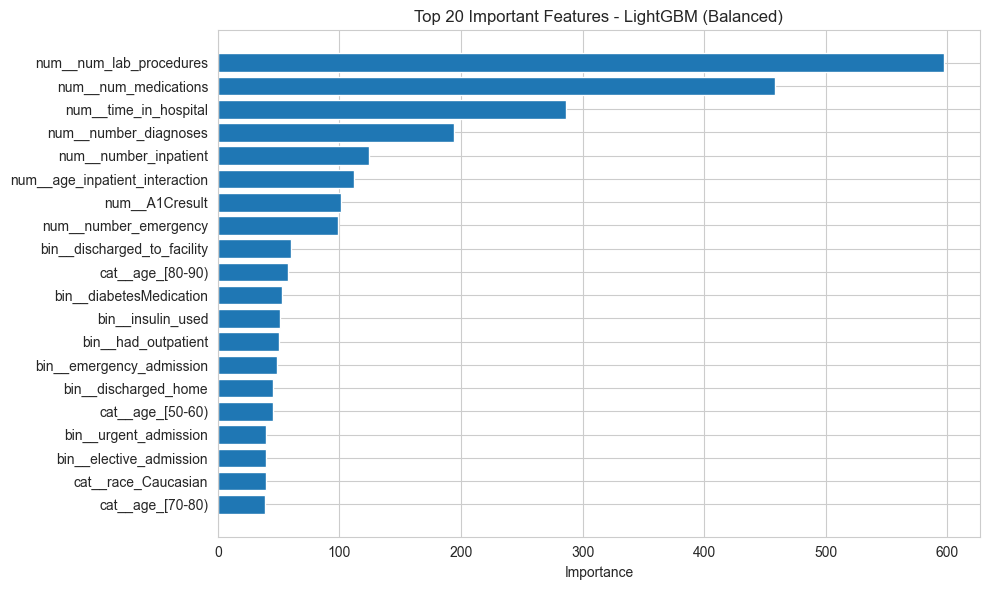

,Feature,Importance
1,num__num_lab_procedures,597
2,num__num_medications,458
0,num__time_in_hospital,286
5,num__number_diagnoses,194
4,num__number_inpatient,124
8,num__age_inpatient_interaction,112
7,num__A1Cresult,101
3,num__number_emergency,99
37,bin__discharged_to_facility,60
23,cat__age_[80-90),58


In [ ]:

lgb_model = pipeline_lgb_bal.named_steps['classifier']

feature_names = pipeline_lgb_bal.named_steps['preprocessor'].get_feature_names_out()


importances = lgb_model.feature_importances_


import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:20][::-1], feature_importance_df['Importance'][:20][::-1])
plt.xlabel('Importance')
plt.title('Top 20 Important Features - LightGBM (Balanced)')
plt.tight_layout()
plt.show()

feature_importance_df


In [ ]:
import shap


model_lgb_bal = pipeline_lgb_bal.named_steps['classifier']


X_test_processed = pipeline_lgb_bal.named_steps['preprocessor'].transform(x_test)


explainer = shap.TreeExplainer(model_lgb_bal)

shap_values = explainer.shap_values(X_test_processed)


c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\explainers\_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


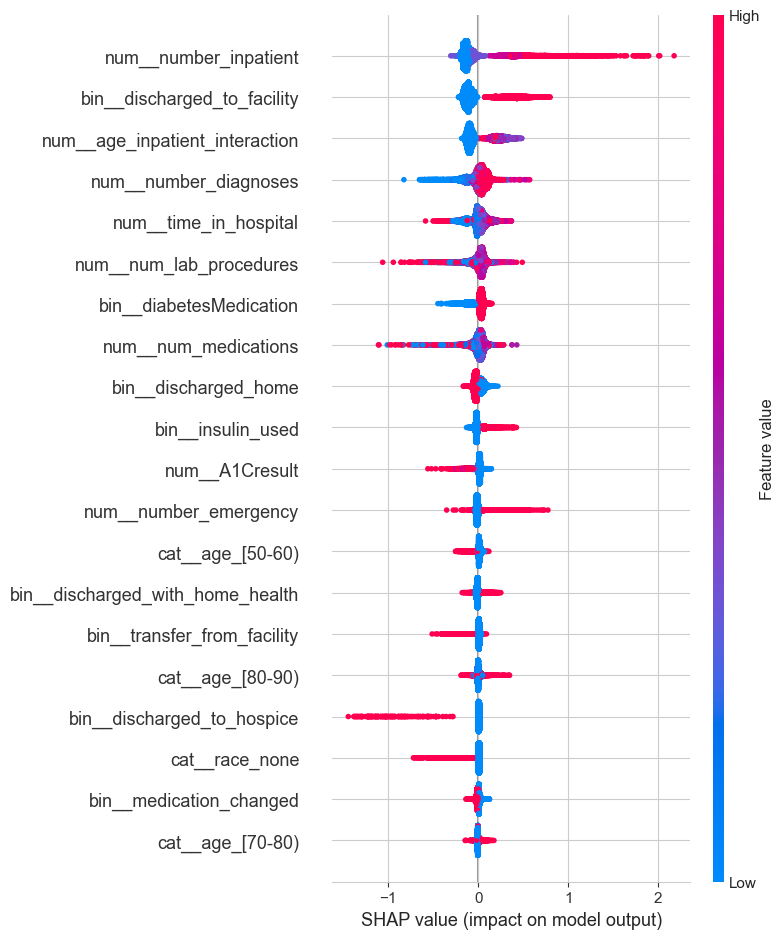

In [ ]:

feature_names = pipeline_lgb_bal.named_steps['preprocessor'].get_feature_names_out()

shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names)




To interpret the LightGBM model's predictions and identify which features contribute most to readmission:

---

### 1. Feature Importance (Built-in from LightGBM)
- extracted the trained `LightGBMClassifier` from the pipeline.
- Retrieve feature names using the pipeline's preprocessor.
- Use `.feature_importances_` to quantify how much each feature contributed to predictions.
- Plot the top 20 features using a horizontal bar chart.

---

### 2. SHAP Summary Plot
- SHAP (SHapley Additive exPlanations) values offer a more granular view of feature impact.
-  `shap.TreeExplainer()` to compute SHAP values for the test set.
- A summary plot is generated to show:
  - Features with the highest overall influence.
  - Direction of impact (positive vs. negative SHAP values).
  - Dispersion of impact per sample (colored dots).

This interpretability step helps us explain why the model is predicting readmission for certain patients and increases trust in our ML solution.


---

### 🔍 What This Plot Shows:

- **Y-axis (Features)**: Top 20 most important features.
- **X-axis (SHAP value)**: Impact on the **model output** (readmission prediction).
  - **> 0** means **pushing prediction toward readmission (class 1)**
  - **< 0** means **pushing prediction toward no readmission (class 0)**

- **Color bar (Feature Value)**:
  - **Red** = high feature value
  - **Blue** = low feature value





# Hyperparameter 

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import loguniform

pipeline_lr_tuned = Pipeline(steps=[
    ('preprocessor', build_preprocessor(use_scaler=True)),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear', random_state=42))
])


param_grid_lr = {
    'classifier__C': loguniform(0.001, 10),   
    'classifier__penalty': ['l1', 'l2']
}

search_lr = RandomizedSearchCV(
    estimator=pipeline_lr_tuned,
    param_distributions=param_grid_lr,
    n_iter=20,
    scoring='f1',
    cv=4,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

search_lr.fit(x_train, y_train)


Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['time_in_hospital',
                                                                                'num_lab_procedures',
                                                                                'num_medications',
                                                                                'number_emergency',
                                                                                'number_inpatient',
                                                                                'number_diagnoses',
                                                                                'max_glu_serum',
                                                                                'A1Cresult',
                                                                                'age_inpatient_interaction'...
                                                                                'high_risk_with_medication',
                                                                                'insulin_used'])])),
                                             ('classifier',
                                              LogisticRegression(class_weight='balanced',
                                                                 max_iter=1000,
                                                                 random_state=42,
                                                                 solver='liblinear'))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000290078D8340>,
                                        'classifier__penalty': ['l1', 'l2']},
                   random_state=42, scoring='f1', verbose=2)

In [137]:
print("Best Parameters for Logistic Regression:")
print(search_lr.best_params_)

y_train_pred_lr = search_lr.best_estimator_.predict(x_train)
y_pred_lr = search_lr.best_estimator_.predict(x_test)

print("\nTraining Accuracy of Logistic Regression (Tuned):", accuracy_score(y_train,y_train_pred_lr))
print("Test Accuracy of Logistic Regression (Tuned):", accuracy_score(y_test,y_pred_lr))

print("\nConfusion Matrix of Logistic Regression(Tuned)\n ", confusion_matrix(y_test, y_pred_lr))







Best Parameters for Logistic Regression:
{'classifier__C': 0.11400863701127326, 'classifier__penalty': 'l2'}

Training Accuracy of Logistic Regression (Tuned): 0.6595749907873726
Test Accuracy of Logistic Regression (Tuned): 0.6607379747457377

Confusion Matrix of Logistic Regression(Tuned)
  [[12157  5925]
 [  980  1291]]


In [138]:
print("Classification Report :")
print(classification_report(y_test, y_pred_lr))

Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.67      0.78     18082
           1       0.18      0.57      0.27      2271

    accuracy                           0.66     20353
   macro avg       0.55      0.62      0.53     20353
weighted avg       0.84      0.66      0.72     20353



In [ ]:
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV


scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

pipeline_xgb_tuned = Pipeline(steps=[
    ('preprocessor', build_preprocessor(use_scaler=False)),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight,
        random_state=42
    ))
])


param_grid_xgb = {
    'classifier__n_estimators': randint(100, 300),
    'classifier__learning_rate': uniform(0.01, 0.2),
    'classifier__max_depth': randint(3, 10),
    'classifier__subsample': uniform(0.6, 0.4),
    'classifier__colsample_bytree': uniform(0.6, 0.4),
    'classifier__min_child_weight': randint(1, 10)
}


search_xgb = RandomizedSearchCV(
    estimator=pipeline_xgb_tuned,
    param_distributions=param_grid_xgb,
    n_iter=30,
    scoring='f1',
    cv=4,
    random_state=42,
    verbose=2,
    n_jobs=-1
)


search_xgb.fit(x_train, y_train)


Fitting 4 folds for each of 30 candidates, totalling 120 fits


c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:12:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               ['time_in_hospital',
                                                                                'num_lab_procedures',
                                                                                'num_medications',
                                                                                'number_emergency',
                                                                                'number_inpatient',
                                                                                'number_diagnoses',
                                                                                'max_glu_serum',
                                                                                'A1Cresult',
                                                                                'age_inpatient_interaction']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('...
                                        'classifier__min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029013168C70>,
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000290078D8190>,
                                        'classifier__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029013169330>},
                   random_state=42, scoring='f1', verbose=2)

In [140]:
print("Best Parameters for XGBoost:")
print(search_xgb.best_params_)

y_train_pred_xgb = search_xgb.best_estimator_.predict(x_train)
y_pred_xgb = search_xgb.best_estimator_.predict(x_test)

print("\nTraining Accuracy of XGBoost (Tuned):", accuracy_score(y_train,y_train_pred_xgb))
print("Test Accuracy of XGBoost (Tuned):", accuracy_score(y_test,y_pred_xgb))

print("\nConfusion Matrix of XGBoost(Tuned)\n ", confusion_matrix(y_test, y_pred_xgb))



Best Parameters for XGBoost:
{'classifier__colsample_bytree': 0.9627313766183017, 'classifier__learning_rate': 0.06442644987692707, 'classifier__max_depth': 5, 'classifier__min_child_weight': 9, 'classifier__n_estimators': 215, 'classifier__subsample': 0.7410275425336676}

Training Accuracy of XGBoost (Tuned): 0.664979732219629
Test Accuracy of XGBoost (Tuned): 0.6522871321181153

Confusion Matrix of XGBoost(Tuned)
  [[11929  6153]
 [  924  1347]]


In [141]:
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.66      0.77     18082
           1       0.18      0.59      0.28      2271

    accuracy                           0.65     20353
   macro avg       0.55      0.63      0.52     20353
weighted avg       0.84      0.65      0.72     20353



In [142]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


param_grid = {
    'classifier__n_estimators': randint(100, 800),
    'classifier__learning_rate': uniform(0.01, 0.2),
    'classifier__max_depth': randint(3, 15),
    'classifier__num_leaves': randint(20, 100),
    'classifier__min_child_samples': randint(10, 100),
    'classifier__subsample': uniform(0.5, 0.5),
    'classifier__colsample_bytree': uniform(0.5, 0.5)
}


In [ ]:
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import lightgbm as lgb


cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

search_lgb = RandomizedSearchCV(
    pipeline_lgb_bal,
    param_distributions=param_grid,
    n_iter=30,  
    scoring='f1',  
    n_jobs=-1,
    cv=cv,
    verbose=2,
    random_state=42
)

search_lgb.fit(x_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Info] Number of positive: 9086, number of negative: 72324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               ['time_in_hospital',
                                                                                'num_lab_procedures',
                                                                                'num_medications',
                                                                                'number_emergency',
                                                                                'number_inpatient',
                                                                                'number_diagnoses',
                                                                                'max_glu_serum',
                                                                                'A1Cresult',...
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029007902DD0>,
                                        'classifier__num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002901316ACB0>,
                                        'classifier__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029013168A30>},
                   random_state=42, scoring='f1', verbose=2)

In [145]:
print("Best parameters found for Lightbgm:")
print(search_lgb.best_params_)

best_model = search_lgb.best_estimator_

y_train_pred_lgb = best_model.predict(x_train)

y_pred_lgb = best_model.predict(x_test)


print("\nTraining Accuracy of Lightbgm (Tuned):", accuracy_score(y_train,y_train_pred_lgb))
print("\nTest Accuracy of Lightbgm (Tuned):", accuracy_score(y_test,y_pred_lgb))

print("\nConfusion Matrix of Lightbgm(Tuned)\n ", confusion_matrix(y_test, y_pred_lgb))





Best parameters found for Lightbgm:
{'classifier__colsample_bytree': 0.7475884550556351, 'classifier__learning_rate': 0.01687770422304368, 'classifier__max_depth': 3, 'classifier__min_child_samples': 45, 'classifier__n_estimators': 661, 'classifier__num_leaves': 23, 'classifier__subsample': 0.6558555380447055}

Training Accuracy of Lightbgm (Tuned): 0.6337059329320722

Test Accuracy of Lightbgm (Tuned): 0.6359259077285904

Confusion Matrix of Lightbgm(Tuned)
  [[11527  6555]
 [  855  1416]]


In [146]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     18082
           1       0.18      0.62      0.28      2271

    accuracy                           0.64     20353
   macro avg       0.55      0.63      0.52     20353
weighted avg       0.85      0.64      0.70     20353





Performed hyperparameter tuning using `RandomizedSearchCV` for the three main classifiers: Logistic Regression, XGBoost, and LightGBM. The tuning focuses on optimizing the **F1-score** due to class imbalance and the importance of correctly identifying readmissions.

---

### 1. Logistic Regression (Tuned)
- Tuned `C` (inverse regularization) and `penalty` (L1/L2).
- Used `class_weight='balanced'` to adjust for imbalance.
- Final model evaluated with:
  - Accuracy
  - Classification report
  - Confusion matrix

---

### 2. XGBoost (Tuned)
- Tuned parameters: `n_estimators`, `learning_rate`, `max_depth`, `min_child_weight`, `subsample`, and `colsample_bytree`.
- Used `scale_pos_weight` to balance the dataset.
- Best parameters identified through 4-fold cross-validation.
- Final model evaluated and compared against previous models.

---

### 3. LightGBM (Tuned)
- Tuned parameters include `num_leaves`, `min_child_samples`, `learning_rate`, and tree sampling parameters.
- 3-fold StratifiedKFold used for cross-validation.
- Results evaluated on training/test accuracy, F1-score, and classification metrics.

This tuning process helps us compare the best-performing version of each model before finalizing our production-ready model.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def get_model_metrics(model_name, model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    return {
        'Model': model_name,
        'Train Accuracy': round(accuracy_score(y_train, y_train_pred), 4),
        'Test Accuracy': round(accuracy_score(y_test, y_test_pred), 4),
        'Precision (1)': round(precision_score(y_test, y_test_pred), 4),
        'Recall (1)': round(recall_score(y_test, y_test_pred), 4),
        'F1-score (1)': round(f1_score(y_test, y_test_pred), 4)
    }

tuned_models = [
    ('Logistic Regression (Tuned)', search_lr.best_estimator_),
    ('XGBoost (Tuned)', search_xgb.best_estimator_),
    ('LightGBM (Tuned)', search_lgb.best_estimator_)
]


tuned_model_scores = [
    get_model_metrics(name, model, x_train, y_train, x_test, y_test)
    for name, model in tuned_models
]


tuned_scores_df = pd.DataFrame(tuned_model_scores)

# Display
tuned_scores_df


,Model,Train Accuracy,Test Accuracy,Precision (1),Recall (1),F1-score (1)
0,Logistic Regression (Tuned),0.6596,0.6607,0.1789,0.5685,0.2722
1,XGBoost (Tuned),0.6650,0.6523,0.1796,0.5931,0.2757
2,LightGBM (Tuned),0.6337,0.6359,0.1776,0.6235,0.2765


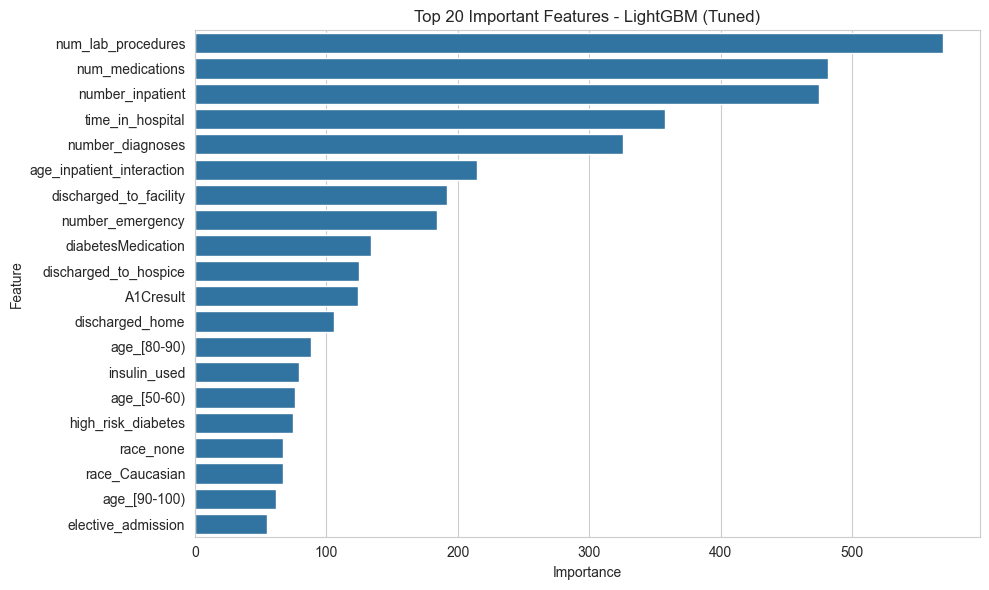

,Feature,Importance
1,num_lab_procedures,569
2,num_medications,482
4,number_inpatient,475
0,time_in_hospital,358
5,number_diagnoses,326
8,age_inpatient_interaction,215
37,discharged_to_facility,192
3,number_emergency,184
45,diabetesMedication,134
41,discharged_to_hospice,125


In [148]:
def get_feature_names(preprocessor):
    feature_names = []
    for name, transformer, columns in preprocessor.transformers_:
        if hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(columns)
            feature_names.extend(names)
        else:
            feature_names.extend(columns)
    return feature_names

lgb_model = search_lgb.best_estimator_.named_steps['classifier']
preprocessor_lgb = search_lgb.best_estimator_.named_steps['preprocessor']
feature_names_lgb = get_feature_names(preprocessor_lgb)

importances = lgb_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names_lgb,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title("Top 20 Important Features - LightGBM (Tuned)")
plt.tight_layout()
plt.show()

importance_df

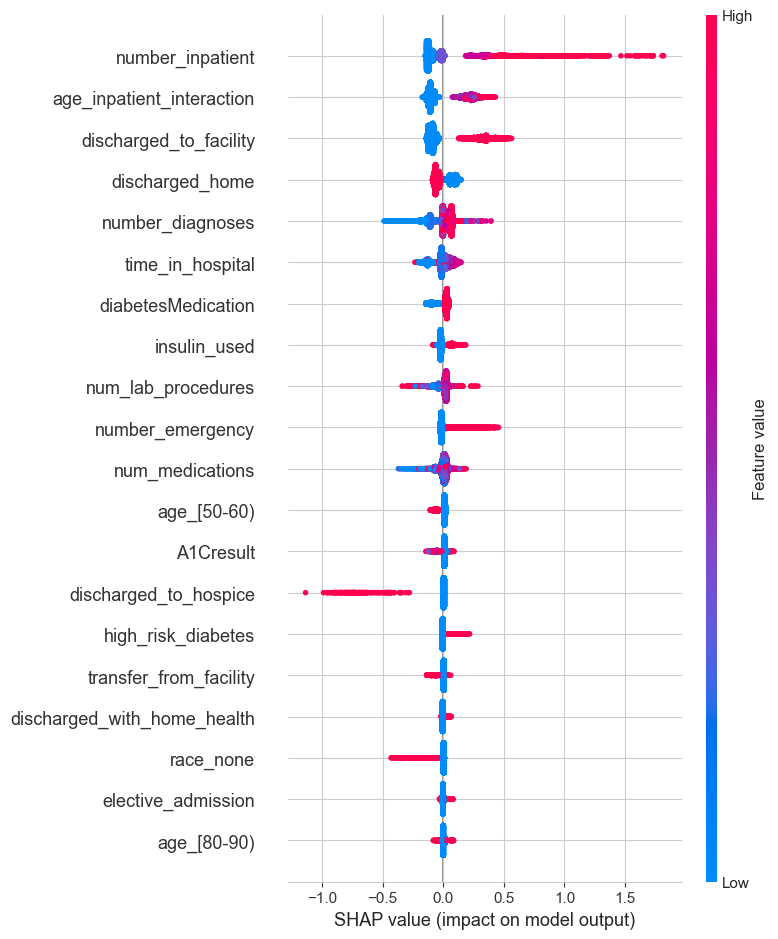

In [ ]:
import shap


X_test_transformed = preprocessor_lgb.transform(x_test)

explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_test_transformed)

shap.summary_plot(shap_values, features=X_test_transformed, feature_names=feature_names_lgb)


## SMOTE 

3. Apply preprocessing ONLY to X_train before SMOTE

In [150]:
preprocessor = build_preprocessor(use_scaler=False)

X_train_processed = preprocessor.fit_transform(x_train)
X_test_processed = preprocessor.transform(x_test)


In [151]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)


In [152]:
from collections import Counter
print(Counter(y_train))        # Before SMOTE
print(Counter(y_train_res))    # After SMOTE


Counter({0: 72324, 1: 9086})
Counter({0: 72324, 1: 72324})


From Imbalanced it is balanced now 

In [153]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=42)
model.fit(X_train_res, y_train_res)


[LightGBM] [Info] Number of positive: 72324, number of negative: 72324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10660
[LightGBM] [Info] Number of data points in the train set: 144648, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

In [154]:

y_pred = model.predict(X_test_processed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18082
           1       0.57      0.02      0.03      2271

    accuracy                           0.89     20353
   macro avg       0.73      0.51      0.49     20353
weighted avg       0.85      0.89      0.84     20353



In [157]:
y_probs = model.predict_proba(X_test_processed)[:, 1]  # probabilities for class 1
train_accuracy = accuracy_score(y_train_res, model.predict(X_train_res))
print(f"\nTraining Accuracy: {train_accuracy:.4f}")

thresholds = [0.1, 0.15, 0.20]
for i in thresholds:
    y_pred_thresh = (y_probs >= i).astype(int)
    print(f"\nThreshold = {i}")
    print(classification_report(y_test, y_pred_thresh))
    print(f"Test Accuracy at threshold {i}: {accuracy_score(y_test, y_pred_thresh):.4f}")
    print(f"Confusion Matrix at threshold {i}:\n{confusion_matrix(y_test, y_pred_thresh)}")





Training Accuracy: 0.9356

Threshold = 0.1
              precision    recall  f1-score   support

           0       0.94      0.49      0.64     18082
           1       0.16      0.76      0.26      2271

    accuracy                           0.52     20353
   macro avg       0.55      0.62      0.45     20353
weighted avg       0.85      0.52      0.60     20353

Test Accuracy at threshold 0.1: 0.5180
Confusion Matrix at threshold 0.1:
[[8821 9261]
 [ 550 1721]]

Threshold = 0.15
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     18082
           1       0.19      0.44      0.27      2271

    accuracy                           0.73     20353
   macro avg       0.56      0.60      0.55     20353
weighted avg       0.84      0.73      0.77     20353

Test Accuracy at threshold 0.15: 0.7332
Confusion Matrix at threshold 0.15:
[[13924  4158]
 [ 1272   999]]

Threshold = 0.2
              precision    recall  f1-score   support

    



SMOTE (Synthetic Minority Over-sampling Technique) helps resolve class imbalance by generating synthetic samples of the minority class (readmitted patients). This helps the model learn better from underrepresented examples.


